In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics._classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [2]:
#reading the gene and variation data
data = pd.read_csv('training_variants') #read the file
print('Number of data points : ', data.shape[0]) #number of rows
print('Number of features : ', data.shape[1]) #number of columns
print('Features : ', data.columns.values) #get column names #https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
data.head() #print first 5 rows in a data

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [4]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
set(stopwords.words('english')) 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
string = ""

In [7]:
string


''

In [8]:
# loading stop words from nltk library
#preprocessing function 
stop_words = set(stopwords.words('english')) # stopwords are the words that doesnt really matter
                                             # "stopwords.words('english')" creates a list with all stopwords 
                                             # set(stopwords.words('english') creates a set with all stopwords
def nlp_preprocessing(total_text, index, column): 
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
        # if a word is not a stop word I will keep it and if it is a stop word I will remove it
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [9]:
start_time = time.clock()

In [10]:
start_time

1.1e-06

In [11]:
data_text

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...
3316,3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,The Runt-related transcription factor 1 gene (...
3319,3319,The RUNX1/AML1 gene is the most frequent targe...


In [12]:
data_text.iterrows()

<generator object DataFrame.iterrows at 0x0000029D81A80A98>

In [13]:
for index, row in data_text.iterrows():
    print(index,row)

0 ID                                                      0
TEXT    Cyclin-dependent kinases (CDKs) regulate a var...
Name: 0, dtype: object
1 ID                                                      1
TEXT     Abstract Background  Non-small cell lung canc...
Name: 1, dtype: object
2 ID                                                      2
TEXT     Abstract Background  Non-small cell lung canc...
Name: 2, dtype: object
3 ID                                                      3
TEXT    Recent evidence has demonstrated that acquired...
Name: 3, dtype: object
4 ID                                                      4
TEXT    Oncogenic mutations in the monomeric Casitas B...
Name: 4, dtype: object
5 ID                                                      5
TEXT    Oncogenic mutations in the monomeric Casitas B...
Name: 5, dtype: object
6 ID                                                      6
TEXT    Oncogenic mutations in the monomeric Casitas B...
Name: 6, dtype: object
7 ID         

Name: 96, dtype: object
97 ID                                                     97
TEXT    Transforming growth factor Î² (TGFÎ²) plays a ...
Name: 97, dtype: object
98 ID                                                     98
TEXT    In many cancers, inactivating mutations in bot...
Name: 98, dtype: object
99 ID                                                     99
TEXT    TbR-II (transforming growth factor b [TGF-b] t...
Name: 99, dtype: object
100 ID                                                    100
TEXT    Signaling by transforming growth factor-Î² (TG...
Name: 100, dtype: object
101 ID                                                    101
TEXT    Melanoma patients treated with oncogenic BRAF ...
Name: 101, dtype: object
102 ID                                                    102
TEXT    Identification of a high-risk disease-causing ...
Name: 102, dtype: object
103 ID                                                    103
TEXT    The MSH6 gene is one of the mismatch-repai

Name: 217, dtype: object
218 ID                                                    218
TEXT    Nonâ€“small-cell lung cancer is the leading ca...
Name: 218, dtype: object
219 ID                                                    219
TEXT    Epidermal growth factor receptor (EGFR) mutati...
Name: 219, dtype: object
220 ID                                                    220
TEXT    Antibodies against epidermal growth factor rec...
Name: 220, dtype: object
221 ID                                                    221
TEXT     In contrast to other primary epidermal growth...
Name: 221, dtype: object
222 ID                                                    222
TEXT    Introduction The epidermal growth factor recep...
Name: 222, dtype: object
223 ID                                                    223
TEXT    Purpose: Clinical features of epidermal growth...
Name: 223, dtype: object
224 ID                                                    224
TEXT    Purpose: Clinical features of epide

Name: 329, dtype: object
330 ID                                                    330
TEXT    Oncogenic gene fusions involving the 3â€™ regi...
Name: 330, dtype: object
331 ID                                                    331
TEXT    Echinoderm microtubule associated protein like...
Name: 331, dtype: object
332 ID                                                    332
TEXT    Echinoderm microtubule associated protein like...
Name: 332, dtype: object
333 ID                                                    333
TEXT    Inflammatory myofibroblastic tumor (IMT) is a ...
Name: 333, dtype: object
334 ID                                                    334
TEXT    Patients with anaplastic lymphoma kinase (ALK)...
Name: 334, dtype: object
335 ID                                                    335
TEXT    Kinases activated by gene fusions represent an...
Name: 335, dtype: object
336 ID                                                    336
TEXT    Oncogenic gene fusions involving th

Name: 477, dtype: object
478 ID                                                    478
TEXT    Tumor suppressor p53-dependent apoptosis is th...
Name: 478, dtype: object
479 ID                                                    479
TEXT    Somatic TP53 mutations have been described in ...
Name: 479, dtype: object
480 ID                                                    480
TEXT    Mutations in the p53 tumor suppressor are the ...
Name: 480, dtype: object
481 ID                                                    481
TEXT    TP53 is the most commonly mutated gene in head...
Name: 481, dtype: object
482 ID                                                    482
TEXT     Abstract Purpose  Adrenocortical carcinoma (A...
Name: 482, dtype: object
483 ID                                                    483
TEXT    The transcription factor and tumor suppressor ...
Name: 483, dtype: object
484 ID                                                    484
TEXT    The transcription factor and tumor 

692 ID                                                    692
TEXT    Cell division is controlled by a series of pos...
Name: 692, dtype: object
693 ID                                                    693
TEXT    Cell division is controlled by a series of pos...
Name: 693, dtype: object
694 ID                                                    694
TEXT    Introduction  Since the first proposal of a po...
Name: 694, dtype: object
695 ID                                                    695
TEXT    Introduction  Since the first proposal of a po...
Name: 695, dtype: object
696 ID                                                    696
TEXT    Multiple myeloma (MM) is an incurable plasma c...
Name: 696, dtype: object
697 ID                                                    697
TEXT    Familial renal cell carcinoma (RCC) is genetic...
Name: 697, dtype: object
698 ID                                                    698
TEXT    Familial renal cell carcinoma (RCC) is genetic...
Name: 698,

Name: 836, dtype: object
837 ID                                                    837
TEXT    The BCR-ABL oncogene is generated by the Phila...
Name: 837, dtype: object
838 ID                                                    838
TEXT     Abstract  Mutations in the Bcr-Abl kinase dom...
Name: 838, dtype: object
839 ID                                                    839
TEXT     Abstract  Mutations in the Bcr-Abl kinase dom...
Name: 839, dtype: object
840 ID                                                    840
TEXT     Abstract  Mutations in the Bcr-Abl kinase dom...
Name: 840, dtype: object
841 ID                                                    841
TEXT    In 1960, Nowell and Hungerford identified an a...
Name: 841, dtype: object
842 ID                                                    842
TEXT    Discovery of imatinib mesylate (IM) as the tar...
Name: 842, dtype: object
843 ID                                                    843
TEXT     Abstract  Mutations in the Bcr-Abl

Name: 941, dtype: object
942 ID                                                    942
TEXT    Metastatic breast cancer (MBC) is an incurable...
Name: 942, dtype: object
943 ID                                                    943
TEXT    To identify a new idiopathic basal ganglia cal...
Name: 943, dtype: object
944 ID                                                    944
TEXT    Eosinophilia is common in myeloproliferative d...
Name: 944, dtype: object
945 ID                                                    945
TEXT    Acquired constitutive activation of protein ty...
Name: 945, dtype: object
946 ID                                                    946
TEXT     Abstract Infantile myofibromatosis (IM) is th...
Name: 946, dtype: object
947 ID                                                    947
TEXT    Fusion genes involving tyrosine kinases (TKs) ...
Name: 947, dtype: object
948 ID                                                    948
TEXT    Chronic myeloproliferative disorder

Name: 1077, dtype: object
1078 ID                                                   1078
TEXT    FoxA1 (FOXA1) is a pioneering transcription fa...
Name: 1078, dtype: object
1079 ID                                                   1079
TEXT    ABSTRACT The p53 tumor suppressor gene is inac...
Name: 1079, dtype: object
1080 ID                                                   1080
TEXT    ARID1A (BAF250A) promotes the formation of SWI...
Name: 1080, dtype: object
1081 ID                                                   1081
TEXT    EZH2, the catalytic subunit of the PRC2 comple...
Name: 1081, dtype: object
1082 ID                                                   1082
TEXT    EZH2, the catalytic subunit of the PRC2 comple...
Name: 1082, dtype: object
1083 ID                                                   1083
TEXT    EZH2, the catalytic subunit of the PRC2 comple...
Name: 1083, dtype: object
1084 ID                                                   1084
TEXT    EZH2, the catalytic s

1191 ID                                                   1191
TEXT    Many human cancers involve up-regulation of th...
Name: 1191, dtype: object
1192 ID                                                   1192
TEXT     Introduction In 2004, Samuels et al. reported...
Name: 1192, dtype: object
1193 ID                                                   1193
TEXT    The PI3K/PTEN/AKT signaling pathway, a pathway...
Name: 1193, dtype: object
1194 ID                                                   1194
TEXT     Introduction In 2004, Samuels et al. reported...
Name: 1194, dtype: object
1195 ID                                                   1195
TEXT    Activation of the phosphoinositide 3-kinase (P...
Name: 1195, dtype: object
1196 ID                                                   1196
TEXT    Large-scale sequencing efforts are uncovering ...
Name: 1196, dtype: object
1197 ID                                                   1197
TEXT    Advanced urothelial carcinoma (UC) of the blad.

Name: 1324, dtype: object
1325 ID                                                   1325
TEXT    Abstract We characterized four pancreatic carc...
Name: 1325, dtype: object
1326 ID                                                   1326
TEXT    Identification of a high-risk disease-causing ...
Name: 1326, dtype: object
1327 ID                                                   1327
TEXT    Cancers arise from the sequential acquisition ...
Name: 1327, dtype: object
1328 ID                                                   1328
TEXT    Mismatch-repair factors have a prominent role ...
Name: 1328, dtype: object
1329 ID                                                   1329
TEXT    Mismatch-repair factors have a prominent role ...
Name: 1329, dtype: object
1330 ID                                                   1330
TEXT    Identification of a high-risk disease-causing ...
Name: 1330, dtype: object
1331 ID                                                   1331
TEXT    Mismatch-repair facto

Name: 1440, dtype: object
1441 ID                                                   1441
TEXT    In the largest E3 ligase subfamily, Cul3 binds...
Name: 1441, dtype: object
1442 ID                                                   1442
TEXT    In the largest E3 ligase subfamily, Cul3 binds...
Name: 1442, dtype: object
1443 ID                                                   1443
TEXT    In the largest E3 ligase subfamily, Cul3 binds...
Name: 1443, dtype: object
1444 ID                                                   1444
TEXT    In the largest E3 ligase subfamily, Cul3 binds...
Name: 1444, dtype: object
1445 ID                                                   1445
TEXT    In the largest E3 ligase subfamily, Cul3 binds...
Name: 1445, dtype: object
1446 ID                                                   1446
TEXT    In the largest E3 ligase subfamily, Cul3 binds...
Name: 1446, dtype: object
1447 ID                                                   1447
TEXT    In the largest E3 lig

Name: 1662, dtype: object
1663 ID                                                   1663
TEXT    Tyrosine kinase domain mutations are a common ...
Name: 1663, dtype: object
1664 ID                                                   1664
TEXT    FMS-like tyrosine kinase 3 (FLT3) inhibitors h...
Name: 1664, dtype: object
1665 ID                                                   1665
TEXT    Mutations in the juxtamembrane and kinase doma...
Name: 1665, dtype: object
1666 ID                                                   1666
TEXT    Mutations in the juxtamembrane and kinase doma...
Name: 1666, dtype: object
1667 ID                                                   1667
TEXT    In acute myeloid leukemia (AML), two clusters ...
Name: 1667, dtype: object
1668 ID                                                   1668
TEXT    Mutations in the juxtamembrane and kinase doma...
Name: 1668, dtype: object
1669 ID                                                   1669
TEXT    Mutations in the juxt

1884 ID                                                   1884
TEXT    The MCF-7 breast cancer cell line was exposed ...
Name: 1884, dtype: object
1885 ID                                                   1885
TEXT    Genes encoding components of the PI3K-Akt-mTOR...
Name: 1885, dtype: object
1886 ID                                                   1886
TEXT    Genes encoding components of the PI3K-Akt-mTOR...
Name: 1886, dtype: object
1887 ID                                                   1887
TEXT    The MCF-7 breast cancer cell line was exposed ...
Name: 1887, dtype: object
1888 ID                                                   1888
TEXT    Genes encoding components of the PI3K-Akt-mTOR...
Name: 1888, dtype: object
1889 ID                                                   1889
TEXT    Mammalian target of rapamycin (mTOR) is a seri...
Name: 1889, dtype: object
1890 ID                                                   1890
TEXT    Genes encoding components of the PI3K-Akt-mTOR.

Name: 2063, dtype: object
2064 ID                                                   2064
TEXT    SOX9 inactivation is frequent in colorectal ca...
Name: 2064, dtype: object
2065 ID                                                   2065
TEXT    In humans, mutations in SOX9 result in a skele...
Name: 2065, dtype: object
2066 ID                                                   2066
TEXT    In humans, mutations in SOX9 result in a skele...
Name: 2066, dtype: object
2067 ID                                                   2067
TEXT    In humans, mutations in SOX9 result in a skele...
Name: 2067, dtype: object
2068 ID                                                   2068
TEXT    TET proteins oxidize 5-methylcytosine (5mC) on...
Name: 2068, dtype: object
2069 ID                                                   2069
TEXT    The TET proteins are 2-oxoglutarate- and Fe(II...
Name: 2069, dtype: object
2070 ID                                                   2070
TEXT    TET proteins oxidize 

Name: 2189, dtype: object
2190 ID                                                   2190
TEXT    The tumor suppressor gene PTEN is frequently m...
Name: 2190, dtype: object
2191 ID                                                   2191
TEXT    Germline intragenic mutations in PTEN are asso...
Name: 2191, dtype: object
2192 ID                                                   2192
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2192, dtype: object
2193 ID                                                   2193
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2193, dtype: object
2194 ID                                                   2194
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2194, dtype: object
2195 ID                                                   2195
TEXT    The PTEN (phosphatase and tensin homolog) phos...
Name: 2195, dtype: object
2196 ID                                                   2196
TEXT     ABSTRACT To look for

Name: 2376, dtype: object
2377 ID                                                   2377
TEXT    Noonan syndrome (NS) is characterized by short...
Name: 2377, dtype: object
2378 ID                                                   2378
TEXT    Diverse cellular processes are regulated by ty...
Name: 2378, dtype: object
2379 ID                                                   2379
TEXT    Tightly regulated cellular signaling is critic...
Name: 2379, dtype: object
2380 ID                                                   2380
TEXT    Noonan syndrome (NS) is characterized by short...
Name: 2380, dtype: object
2381 ID                                                   2381
TEXT    SHP2, encoded by the PTPN11 gene, is a protein...
Name: 2381, dtype: object
2382 ID                                                   2382
TEXT    Protein-tyrosine phosphatases (PTPs) have key ...
Name: 2382, dtype: object
2383 ID                                                   2383
TEXT    Noonan syndrome (NS) 

2439 ID                                                   2439
TEXT    BRCA1 and BRCA2 mutations are estimated to be ...
Name: 2439, dtype: object
2440 ID                                                   2440
TEXT    Genetic screening of the breast and ovarian ca...
Name: 2440, dtype: object
2441 ID                                                   2441
TEXT     Abstract  The BRCA1 gene from individuals at ...
Name: 2441, dtype: object
2442 ID                                                   2442
TEXT     Abstract  The BRCA1 gene from individuals at ...
Name: 2442, dtype: object
2443 ID                                                   2443
TEXT     Abstract  The BRCA1 gene from individuals at ...
Name: 2443, dtype: object
2444 ID                                                   2444
TEXT    Germline mutations of the breast cancer 1 (BRC...
Name: 2444, dtype: object
2445 ID                                                   2445
TEXT    Mutations in BRCA1 and BRCA2 account for the m.

2683 ID                                                   2683
TEXT    Over 30 mutations of the B-RAF gene associated...
Name: 2683, dtype: object
2684 ID                                                   2684
TEXT    Mutational hotspots indicate selective pressur...
Name: 2684, dtype: object
2685 ID                                                   2685
TEXT     Abstract Activating mutations of the BRAF gen...
Name: 2685, dtype: object
2686 ID                                                   2686
TEXT     Cardio-facio-cutaneous (CFC) syndrome is char...
Name: 2686, dtype: object
2687 ID                                                   2687
TEXT    We have identifi ed previously undiscovered BR...
Name: 2687, dtype: object
2688 ID                                                   2688
TEXT    We have identifi ed previously undiscovered BR...
Name: 2688, dtype: object
2689 ID                                                   2689
TEXT    Papillary thyroid carcinoma (PTC) is the most .

Name: 2938, dtype: object
2939 ID                                                   2939
TEXT    Nuclear factor kappa B (NF-ÎºB) is a transcrip...
Name: 2939, dtype: object
2940 ID                                                   2940
TEXT    This study reports the identification of a nov...
Name: 2940, dtype: object
2941 ID                                                   2941
TEXT    X-linked anhidrotic ectodermal dysplasia with ...
Name: 2941, dtype: object
2942 ID                                                   2942
TEXT    Uveal melanoma is a neoplasm that arises from ...
Name: 2942, dtype: object
2943 ID                                                   2943
TEXT    VEGFR-1 (Flt-1), VEGFR-2 (KDR) and VEGFR-3 (Fl...
Name: 2943, dtype: object
2944 ID                                                   2944
TEXT    Infantile hemangiomas are localized and rapidl...
Name: 2944, dtype: object
2945 ID                                                   2945
TEXT    portance  Inhibition 

3188 ID                                                   3188
TEXT    Oncogenic mutations in the Neuroblastoma Rat S...
Name: 3188, dtype: object
3189 ID                                                   3189
TEXT    The biological and clinical heterogeneity of c...
Name: 3189, dtype: object
3190 ID                                                   3190
TEXT    Oncogenic mutations in the Neuroblastoma Rat S...
Name: 3190, dtype: object
3191 ID                                                   3191
TEXT    Transforming mutations in NRAS and KRAS are th...
Name: 3191, dtype: object
3192 ID                                                   3192
TEXT    KRAS mutations are the most common genetic abn...
Name: 3192, dtype: object
3193 ID                                                   3193
TEXT    To study the oncogenic role of the NRAS oncoge...
Name: 3193, dtype: object
3194 ID                                                   3194
TEXT    The realization in the late 1970s that RAS har.

In [14]:
row['TEXT']

"The most frequent mutations associated with leukemia are recurrent somatic chromosomal translocations or inversions, many of which involve the polyomavirus enhancer-binding protein or core-binding factor transcriptional regulation complex (PEBP2/CBF). Several translocations involve the Î± subunit of this complex, the RUNX1 gene (also called AML1, CBFÎ±2, or PEBP2Î±B) on chromosome 21q22.1 (t(8;21), t(3;21), and t(12;21)). Additionally, the Î² subunit of the complex, PEBP2Î² also called CBFÎ², is disrupted in inv(16)(p13;q22).1 An abundance of evidence points to the existence of genes that predispose to hematologic malignancies. However, large multiple-generation families with hematologic malignancies alone are rare.2 Only 2 loci for familial hematologic malignancies have been identified to date, 1 on chromosome 21q22.13 and the other on 16q22.4 5 These loci contain RUNX1 andPEBP2Î²/CBFÎ², respectively.Studies of families that demonstrate single-gene inheritance for leukemia predisposi

In [15]:
row[1]

"The most frequent mutations associated with leukemia are recurrent somatic chromosomal translocations or inversions, many of which involve the polyomavirus enhancer-binding protein or core-binding factor transcriptional regulation complex (PEBP2/CBF). Several translocations involve the Î± subunit of this complex, the RUNX1 gene (also called AML1, CBFÎ±2, or PEBP2Î±B) on chromosome 21q22.1 (t(8;21), t(3;21), and t(12;21)). Additionally, the Î² subunit of the complex, PEBP2Î² also called CBFÎ², is disrupted in inv(16)(p13;q22).1 An abundance of evidence points to the existence of genes that predispose to hematologic malignancies. However, large multiple-generation families with hematologic malignancies alone are rare.2 Only 2 loci for familial hematologic malignancies have been identified to date, 1 on chromosome 21q22.13 and the other on 16q22.4 5 These loci contain RUNX1 andPEBP2Î²/CBFÎ², respectively.Studies of families that demonstrate single-gene inheritance for leukemia predisposi

In [16]:
print(nlp_preprocessing(row['TEXT'],0,'TEXT'))

None


In [17]:
#text processing stage.
#here I am setting a timer to see how much time it takes to run above preprocessing function
start_time = time.clock() 
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str: #if the TEXT is a string apply the preprocessing function else print id that has no text in it
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 59.7976202 seconds


In [18]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left') 
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,frequent mutations associated leukemia recurre...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [19]:
result[result.isnull().any(axis=1)]#check if there are any null values
                                    # dataframe.any= Return whether any element is True over requested axis. #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html  
                                    # dataframe.isnull()=Object to check null values for  # https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/


,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [20]:
result.loc[result['TEXT'].isnull(),'TEXT'] # dataframe.loc=returns the desired columns of the dataframe  https://www.geeksforgeeks.org/python-pandas-dataframe-loc/

1109    NaN
1277    NaN
1407    NaN
1639    NaN
2755    NaN
Name: TEXT, dtype: object

In [21]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation'] #replacing NaN with gene space variation

In [22]:
result[result['ID']==1109] #intitially TEXT for this ID is NaN now it is replaced with gene space variation

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


In [23]:
y_true = result['Class'].values

In [24]:
y_true

array([1, 2, 2, ..., 1, 4, 4], dtype=int64)

In [25]:
result.Gene  

0       FAM58A
1          CBL
2          CBL
3          CBL
4          CBL
         ...  
3316     RUNX1
3317     RUNX1
3318     RUNX1
3319     RUNX1
3320     RUNX1
Name: Gene, Length: 3321, dtype: object

In [26]:
result.Gene.str.replace('\s+', '_') # https://www.geeksforgeeks.org/python-string-replace/  # https://www.geeksforgeeks.org/python-str-function/

0       FAM58A
1          CBL
2          CBL
3          CBL
4          CBL
         ...  
3316     RUNX1
3317     RUNX1
3318     RUNX1
3319     RUNX1
3320     RUNX1
Name: Gene, Length: 3321, dtype: object

In [27]:
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')
result

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,frequent mutations associated leukemia recurre...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,introduction myelodysplastic syndromes mds het...
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndromes mds het...
3318,3318,RUNX1,Fusions,1,runt related transcription factor 1 gene runx1...
3319,3319,RUNX1,R80C,4,runx1 aml1 gene frequent target chromosomal tr...


In [28]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2) #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
                                                                                         

In [29]:
X_train

,ID,Gene,Variation,Class,TEXT
2395,2395,NF1,Y489C,4,purpose analyze spectrum frequency nf1 mutatio...
720,720,ERBB2,S310F,7,58 year old woman evaluated institution manage...
1461,1461,FGFR2,L770V,6,introduction melanoma lethal skin cancers amer...
90,90,TGFBR1,R487Q,1,loeys dietz syndrome recently described autoso...
877,877,PDGFRA,N870S,3,activating mutations platelet derived growth f...
...,...,...,...,...,...
1620,1620,VHL,P25L,5,background von hippel lindau vhl disease hered...
2505,2505,BRCA1,D1739V,4,mutations brca1 brca2 account majority heredit...
1087,1087,EZH2,Overexpression,7,ezh2 member polycomb group genes important cel...
472,472,TP53,A347T,1,tumor suppressor protein p53 transcription fac...


In [30]:
test_df

,ID,Gene,Variation,Class,TEXT
1514,1514,ALK,T1087I,3,era personalized medicine understanding molecu...
1110,1110,FANCA,Truncating_Mutations,1,abstract fanconi anemia characterized congenit...
948,948,PDGFRB,GIT2-PDGFRB_Fusion,2,chronic myeloproliferative disorders cmpd clon...
1179,1179,PIK3CA,N1044K,7,large scale sequencing efforts uncovering comp...
1238,1238,PIK3CD,E525K,7,genetic mutations cause primary immunodeficien...
...,...,...,...,...,...
2629,2629,BRCA1,E143K,5,missense substitutions uncertain clinical sign...
1305,1305,MLH1,P654L,6,mismatch repair factors prominent role surveyi...
2127,2127,CCND1,P287A,7,although cyclin d1 overexpressed significant n...
535,535,SMAD2,P305L,1,activation canonical tgf signaling pathway pro...


In [31]:
y_train

array([4, 7, 6, ..., 7, 1, 2], dtype=int64)

In [32]:
y_test

array([3, 1, 2, 7, 7, 7, 2, 4, 5, 1, 2, 7, 1, 1, 7, 4, 7, 2, 7, 1, 2, 2,
       2, 7, 7, 3, 7, 7, 4, 2, 7, 1, 7, 5, 7, 7, 2, 4, 6, 7, 5, 4, 7, 1,
       2, 1, 2, 4, 2, 1, 4, 2, 2, 7, 7, 1, 4, 4, 7, 5, 7, 2, 7, 4, 7, 8,
       7, 1, 1, 6, 7, 1, 1, 2, 1, 1, 4, 1, 7, 6, 3, 6, 4, 4, 7, 2, 3, 1,
       4, 2, 2, 1, 3, 4, 7, 2, 1, 2, 4, 9, 1, 7, 7, 4, 4, 6, 2, 4, 2, 7,
       4, 6, 4, 4, 5, 7, 5, 3, 7, 4, 4, 2, 6, 7, 1, 4, 7, 7, 2, 7, 1, 1,
       7, 2, 4, 4, 7, 5, 7, 6, 1, 3, 7, 4, 1, 7, 1, 5, 1, 1, 2, 6, 4, 1,
       9, 1, 6, 4, 3, 4, 7, 7, 7, 4, 7, 3, 2, 7, 9, 4, 7, 2, 2, 4, 5, 7,
       4, 1, 2, 2, 1, 4, 7, 2, 6, 7, 4, 5, 1, 9, 1, 6, 7, 5, 7, 4, 4, 1,
       7, 7, 7, 3, 1, 4, 2, 4, 4, 7, 4, 4, 7, 6, 5, 6, 1, 2, 7, 2, 5, 4,
       7, 4, 4, 5, 7, 7, 1, 1, 2, 2, 7, 7, 2, 4, 1, 7, 4, 6, 2, 1, 1, 2,
       7, 4, 7, 7, 6, 7, 7, 7, 7, 5, 7, 4, 4, 6, 2, 2, 4, 7, 7, 4, 2, 1,
       7, 3, 4, 1, 1, 4, 7, 2, 4, 2, 2, 7, 2, 1, 5, 4, 2, 2, 1, 6, 1, 7,
       1, 7, 7, 4, 5, 5, 1, 4, 4, 5, 1, 2, 4, 5, 4,

In [33]:
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [34]:
train_df

,ID,Gene,Variation,Class,TEXT
2261,2261,PTEN,F154L,4,abstract look direct role ultraviolet radiatio...
2710,2710,BRAF,L597Q,7,erk signaling requires ras induced raf dimeriz...
254,254,EGFR,W731L,7,paucity information molecular perturbations in...
2392,2392,PTPN11,Y62C,7,protein tyrosine phosphatases ptps key positiv...
2307,2307,JAK1,V658F,7,recent work highlighted roles jak janus kinase...
...,...,...,...,...,...
374,374,TP53,C277Q,1,critical determinants dna recognition p53 iden...
481,481,TP53,A161S,4,tp53 commonly mutated gene head neck cancer hn...
1093,1093,MAP3K1,T1481fs,1,langerhans cell histiocytosis lch understood n...
1225,1225,PIK3CB,D1067V,7,activation phosphoinositide 3 kinase pi3k path...


In [35]:
cv_df

,ID,Gene,Variation,Class,TEXT
217,217,EGFR,K745M,4,signal transduction pathways tightly controlle...
3055,3055,KIT,M552_W557del,2,gastrointestinal stromal tumors gist character...
2586,2586,BRCA1,M1628V,1,brca1 tumour suppressor pleiotropic actions ge...
2625,2625,BRCA1,K45Q,5,mutations brca1 brca2 account majority heredit...
288,288,BRD4,Amplification,7,brd4 belongs bet family nuclear proteins carry...
...,...,...,...,...,...
196,196,EGFR,C628Y,3,feature many gliomas amplification epidermal g...
1401,1401,FGFR3,Y647C,2,frequent genetic alterations discovered fgfrs ...
984,984,ETV6,P214L,4,abstract familial platelet disorders associate...
274,274,EGFR,G863D,7,correlations among epidermal growth factor rec...


In [36]:
y_train

array([4, 7, 7, ..., 1, 7, 7], dtype=int64)

In [37]:
y_cv

array([4, 2, 1, 5, 7, 2, 2, 7, 6, 7, 5, 4, 5, 7, 2, 7, 2, 2, 4, 1, 7, 1,
       4, 4, 4, 2, 6, 4, 2, 7, 2, 6, 1, 2, 5, 1, 6, 7, 4, 7, 5, 7, 4, 2,
       6, 7, 3, 1, 2, 6, 4, 3, 7, 2, 1, 1, 7, 9, 1, 1, 2, 6, 6, 2, 2, 6,
       1, 4, 1, 7, 1, 4, 1, 4, 1, 4, 5, 6, 6, 4, 2, 7, 4, 7, 2, 5, 2, 7,
       1, 7, 4, 1, 1, 7, 1, 6, 2, 2, 2, 1, 4, 1, 7, 7, 4, 7, 6, 9, 7, 4,
       2, 4, 1, 7, 6, 6, 1, 5, 6, 7, 1, 4, 2, 1, 4, 6, 1, 7, 6, 7, 4, 1,
       6, 6, 4, 1, 7, 4, 6, 7, 4, 7, 2, 7, 1, 4, 4, 4, 7, 1, 6, 1, 5, 1,
       6, 1, 7, 6, 2, 3, 7, 8, 7, 3, 4, 2, 7, 4, 7, 7, 1, 2, 2, 7, 1, 5,
       1, 4, 4, 6, 2, 9, 4, 7, 2, 7, 7, 4, 7, 7, 3, 5, 1, 7, 8, 5, 1, 7,
       4, 7, 1, 7, 3, 7, 5, 7, 7, 5, 6, 7, 4, 7, 2, 2, 2, 2, 4, 7, 5, 7,
       5, 7, 4, 7, 7, 2, 7, 1, 7, 5, 6, 4, 7, 7, 7, 6, 7, 4, 2, 1, 7, 7,
       5, 1, 7, 1, 6, 5, 4, 7, 2, 4, 7, 3, 1, 7, 7, 4, 3, 4, 5, 4, 1, 7,
       2, 2, 1, 2, 4, 2, 1, 7, 4, 7, 1, 4, 7, 7, 4, 7, 1, 7, 4, 6, 7, 4,
       6, 5, 7, 7, 4, 7, 7, 7, 2, 5, 1, 1, 7, 5, 7,

In [38]:
train_df['Class']  #talking the column 'class' in train_df

2261    4
2710    7
254     7
2392    7
2307    7
       ..
374     1
481     4
1093    1
1225    7
1363    7
Name: Class, Length: 2124, dtype: int64

In [39]:
train_df['Class'].value_counts()  #Number of points belonging to particular class in train_df # Total number of points in train_df=2124  #(609+429+363+289+176+155+57+24+12)=2124

7    609
4    439
1    363
2    289
6    176
5    155
3     57
9     24
8     12
Name: Class, dtype: int64

In [40]:
train_df['Class'].value_counts().sort_values() #sorting them  

8     12
9     24
3     57
5    155
6    176
2    289
1    363
4    439
7    609
Name: Class, dtype: int64

In [41]:
train_class_distribution = train_df['Class'].value_counts().sort_values() # train_df['Class']= talking the column 'class' in train_df  # train_df['Class'].value_counts()=Number of points belonging to particular class # train_df['Class'].value_counts().sort_values()=sorting them    
test_class_distribution = test_df['Class'].value_counts().sort_values()
cv_class_distribution = cv_df['Class'].value_counts().sort_values()

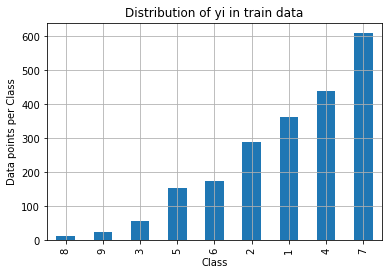

In [42]:
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar') #https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [43]:
train_class_distribution.values #values in train_class_distribution #https://www.geeksforgeeks.org/python-pandas-dataframe-values/

array([ 12,  24,  57, 155, 176, 289, 363, 439, 609], dtype=int64)

In [44]:
-train_class_distribution.values # the minus sign will give us in decreasing order

array([ -12,  -24,  -57, -155, -176, -289, -363, -439, -609], dtype=int64)

In [45]:
np.argsort(-train_class_distribution.values) #https://www.geeksforgeeks.org/numpy-argsort-in-python/ 

array([8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [46]:
sorted_yi = np.argsort(-train_class_distribution.values)

In [47]:
print(train_df.shape[0]) #number of rows in train_df
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)') #https://www.geeksforgeeks.org/numpy-round_-python/
#(609/2124)*100=28.672 % 

2124
Number of data points in class 9 : 609 ( 28.672 %)
Number of data points in class 8 : 439 ( 20.669 %)
Number of data points in class 7 : 363 ( 17.09 %)
Number of data points in class 6 : 289 ( 13.606 %)
Number of data points in class 5 : 176 ( 8.286 %)
Number of data points in class 4 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 2 : 24 ( 1.13 %)
Number of data points in class 1 : 12 ( 0.565 %)


In [48]:
print('-'*80)

--------------------------------------------------------------------------------


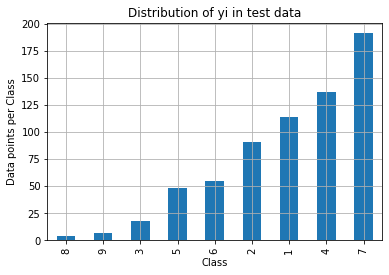

Number of data points in class 9 : 191 ( 28.722 %)
Number of data points in class 8 : 137 ( 20.602 %)
Number of data points in class 7 : 114 ( 17.143 %)
Number of data points in class 6 : 91 ( 13.684 %)
Number of data points in class 5 : 55 ( 8.271 %)
Number of data points in class 4 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 2 : 7 ( 1.053 %)
Number of data points in class 1 : 4 ( 0.602 %)


In [49]:
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')


--------------------------------------------------------------------------------


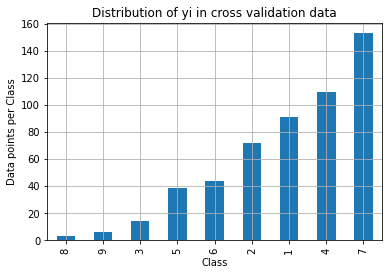

Number of data points in class 9 : 153 ( 28.759 %)
Number of data points in class 8 : 110 ( 20.677 %)
Number of data points in class 7 : 91 ( 17.105 %)
Number of data points in class 6 : 72 ( 13.534 %)
Number of data points in class 5 : 44 ( 8.271 %)
Number of data points in class 4 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 2 : 6 ( 1.128 %)
Number of data points in class 1 : 3 ( 0.564 %)


In [50]:
print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


In [51]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):   #(test_y=actual yi) #(predict_y = predicted yi = yi cap)
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4733363809851414
Log loss on Test Data using Random Model 2.5280261016097594
-------------------- Confusion matrix --------------------


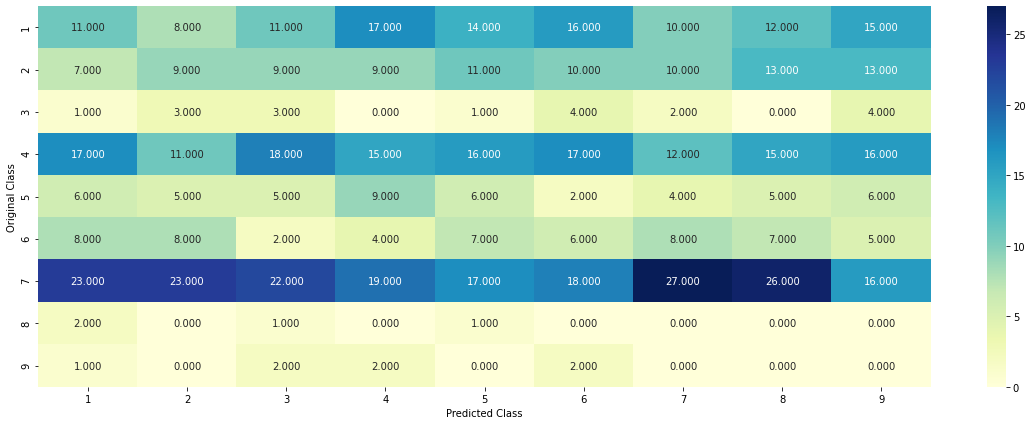

-------------------- Precision matrix (Columm Sum=1) --------------------


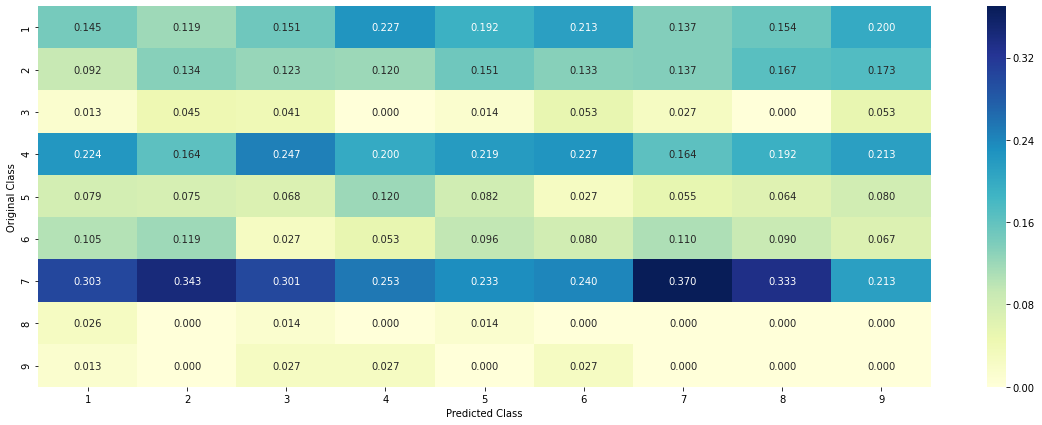

-------------------- Recall matrix (Row sum=1) --------------------


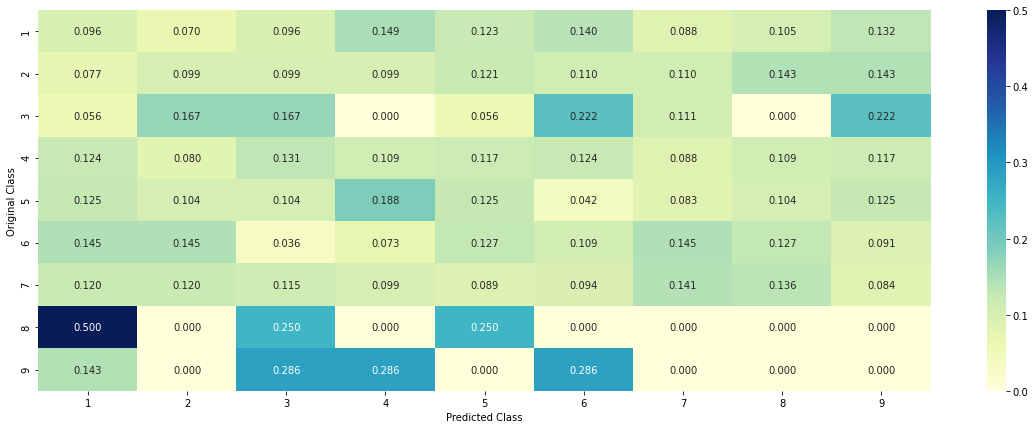

In [52]:
# Here we are simulating the random classifier
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9) #we are generating 9 random numbers
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0]) #we are dividing each of these random probabilities by the sum of these #we dicussed in theory that we need to generate 9 probabilties and ensure that they sum to 1 through normalization
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15)) #computing log loss using log loss function


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)  

#Log loss on Cross Validation Data using Random Model 2.474932049941202 roughly 2.5
#Log loss on Test Data using Random Model 2.461179713907383
#If you rerun this code the above two values 2.4749, 2.4611 changes slightly because random number generator generates different random number every time

In [53]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):  # this function "get_gv_fea_dict" helps you to compute the response coded features
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df): # this function "get_gv_feature" helps you to compute the response coded features
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea
#when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
#(numerator + 10*alpha) / (denominator + 90*alpha)
#this is a simple smoothing function we have added
#there are hyperparameters here that you can tune but we just kept it constant here just for simplicity

In [54]:
#Univariate Analysis on Gene Feature
#Gene is a categorical variable
#How many categories are there and How they are distributed?
unique_genes = train_df['Gene'].value_counts()  #number of times a gene repeats
print('Number of Unique Genes :', unique_genes.shape[0])  #number of rows #https://stackoverflow.com/questions/48134598/x-shape0-vs-x0-shape-in-numpy
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 236
BRCA1     174
TP53      105
EGFR       96
PTEN       79
BRCA2      72
BRAF       64
KIT        61
ERBB2      45
PDGFRA     42
CDKN2A     39
Name: Gene, dtype: int64


In [55]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)#number of rows

Ans: There are 236 different categories of genes in the train data, and they are distibuted as follows


In [56]:
unique_genes.values

array([174, 105,  96,  79,  72,  64,  61,  45,  42,  39,  37,  36,  34,
        30,  30,  28,  27,  26,  24,  24,  22,  22,  22,  21,  20,  19,
        19,  19,  18,  18,  17,  17,  16,  16,  15,  15,  14,  14,  14,
        14,  14,  13,  13,  13,  13,  12,  12,  12,  11,  11,  11,  10,
        10,  10,  10,  10,   9,   9,   9,   8,   8,   8,   8,   8,   8,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   6,   6,
         6,   6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   

In [57]:
sum(unique_genes.values) #sum of all values in unique gene

2124

In [58]:
s = sum(unique_genes.values);
h = unique_genes.values/s; #dividing each value in the array of unique_genes.values by sum 

In [59]:
h 

array([0.0819209 , 0.04943503, 0.04519774, 0.03719397, 0.03389831,
       0.03013183, 0.0287194 , 0.02118644, 0.01977401, 0.01836158,
       0.01741996, 0.01694915, 0.01600753, 0.01412429, 0.01412429,
       0.01318267, 0.01271186, 0.01224105, 0.01129944, 0.01129944,
       0.01035782, 0.01035782, 0.01035782, 0.00988701, 0.0094162 ,
       0.00894539, 0.00894539, 0.00894539, 0.00847458, 0.00847458,
       0.00800377, 0.00800377, 0.00753296, 0.00753296, 0.00706215,
       0.00706215, 0.00659134, 0.00659134, 0.00659134, 0.00659134,
       0.00659134, 0.00612053, 0.00612053, 0.00612053, 0.00612053,
       0.00564972, 0.00564972, 0.00564972, 0.00517891, 0.00517891,
       0.00517891, 0.0047081 , 0.0047081 , 0.0047081 , 0.0047081 ,
       0.0047081 , 0.00423729, 0.00423729, 0.00423729, 0.00376648,
       0.00376648, 0.00376648, 0.00376648, 0.00376648, 0.00376648,
       0.00329567, 0.00329567, 0.00329567, 0.00329567, 0.00329567,
       0.00329567, 0.00329567, 0.00329567, 0.00329567, 0.00329

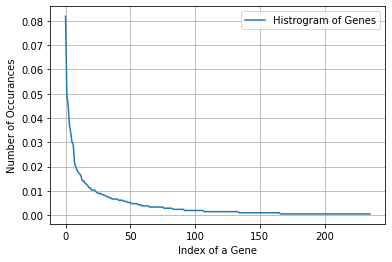

In [60]:
plt.plot(h, label="Histrogram of Genes") #https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

In [61]:
#How to featurize this Gene feature ?
#there are two ways we can featurize this variable
#https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
#(1)One hot Encoding
#(2)Response coding
#We will choose the appropriate featurization based on the ML model we use. For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests.


In [62]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
np.array(get_gv_feature(alpha, "Gene", train_df)) # "get_gv_feature" is a function that computes the math part that is written in notes and gives you the genes converts into response coding this is done here on train data 
                                                  # "get_gv_feature" is a function that is defined above
                                                  #  get_gv_feature(alpha, feature, df) 

array([[0.07692308, 0.0591716 , 0.07692308, ..., 0.0591716 , 0.0591716 ,
        0.0591716 ],
       [0.06493506, 0.22077922, 0.07142857, ..., 0.26623377, 0.06493506,
        0.06493506],
       [0.05376344, 0.19354839, 0.05376344, ..., 0.39247312, 0.05913978,
        0.05376344],
       ...,
       [0.12903226, 0.10752688, 0.10752688, ..., 0.10752688, 0.10752688,
        0.10752688],
       [0.10204082, 0.15306122, 0.10204082, ..., 0.13265306, 0.10204082,
        0.10204082],
       [0.09174312, 0.11009174, 0.11009174, ..., 0.21100917, 0.10091743,
        0.09174312]])

In [63]:
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature                                                                  
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df)) # similarly for test data
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df)) # similarly for CV data

In [64]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape) #response coded features are in train_gene_feature_responsecoding
                                                                                                                                                                 #I have 2124 points. Each point is 9 dimensional(its a 9 dimensional vector consists of probabilities)              

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [65]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
gene_vectorizer.fit_transform(train_df['Gene'])

<2124x235 sparse matrix of type '<class 'numpy.int64'>'
	with 2124 stored elements in Compressed Sparse Row format>

In [66]:
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene']) #one hot encoding converts everything into a large vector
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [67]:
train_df['Gene'].head()

2261      PTEN
2710      BRAF
254       EGFR
2392    PTPN11
2307      JAK1
Name: Gene, dtype: object

In [68]:
gene_vectorizer.get_feature_names() #you can get the feature names

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'asxl1',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxo1',
 'foxp1',
 'gata3',
 'gli1',
 'gna11',
 'gnaq',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'h

In [69]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)
#I have 2124 points. Each point is 233 dimensions because I have 233 genes here

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 235)


In [70]:
#How good is this gene feature in predicting y_i?
#There are many ways to estimate how good a feature is, in predicting y_i. 
#One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

In [71]:
[10 ** x for x in range(-5, 1)]

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1]

In [72]:
alpha = [10 ** x for x in range(-5, 1)]

In [73]:
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


For values of alpha =  1e-05 The log loss is: 1.2171419308158336
For values of alpha =  0.0001 The log loss is: 1.2159810252987786
For values of alpha =  0.001 The log loss is: 1.270854543451677
For values of alpha =  0.01 The log loss is: 1.3923357706630066
For values of alpha =  0.1 The log loss is: 1.4620114202547498
For values of alpha =  1 The log loss is: 1.4951157010876759


In [74]:
cv_log_error_array

[1.2171419308158336,
 1.2159810252987786,
 1.270854543451677,
 1.3923357706630066,
 1.4620114202547498,
 1.4951157010876759]

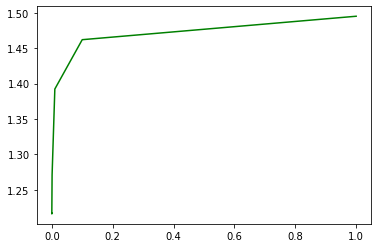

In [75]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g') #https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/

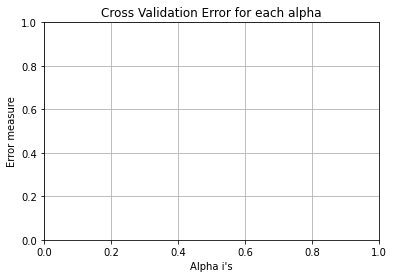

In [76]:
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

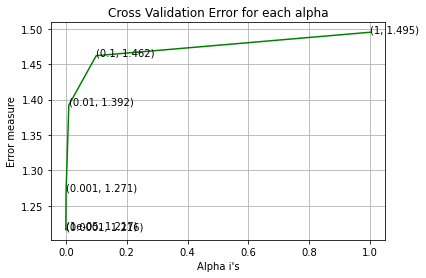

In [77]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g') #https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [78]:
np.argmin(cv_log_error_array) # https://www.geeksforgeeks.org/numpy-argmin-python/ 
                              # cv_log_error_array= [1.16995071333911,1.154525365223637,1.202832821895547,1.335772386875903,1.4373797515730327,1.4670719884604186]
                              # returns us index of the minimum element
                              # min element value in cv_log_error_array is 1.154525365223637
                              # its index is 1

1

In [79]:
best_alpha = np.argmin(cv_log_error_array)

In [80]:
alpha[best_alpha]

0.0001

In [81]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of best alpha =  0.0001 The train log loss is: 0.972460485546631
For values of best alpha =  0.0001 The cross validation log loss is: 1.2159810252987786
For values of best alpha =  0.0001 The test log loss is: 1.1891276949152376


In [82]:
#Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?

#Ans. Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error.

In [83]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  236  genes in train dataset?
Ans
1. In test data 640 out of 665 : 96.2406015037594
2. In cross validation data 521 out of  532 : 97.93233082706767


In [84]:
#Variation, What type of feature is it ?
#Variation is a categorical variable

In [85]:
 #How many categories are there?
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1930
Truncating_Mutations    59
Deletion                49
Amplification           44
Fusions                 21
Overexpression           4
G12V                     4
Q61L                     3
E17K                     3
E542K                    2
G35R                     2
Name: Variation, dtype: int64


In [86]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1930 different categories of variations in the train data, and they are distibuted as follows


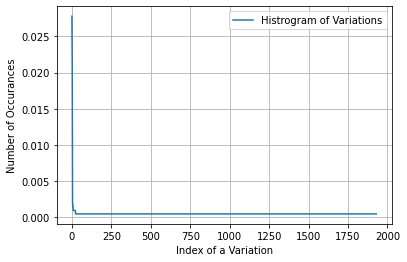

In [87]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02777778 0.05084746 0.07156309 ... 0.99905838 0.99952919 1.        ]


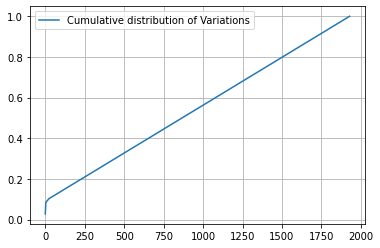

In [88]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

In [89]:
#How to featurize this Variation feature ?
#There are two ways we can featurize this variable check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
#One hot Encoding
#Response coding
#We will be using both these methods to featurize the Variation Feature

In [90]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [91]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [92]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [93]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1961)


For values of alpha =  1e-05 The log loss is: 1.730268908955195
For values of alpha =  0.0001 The log loss is: 1.7228855763804993
For values of alpha =  0.001 The log loss is: 1.7239114967832405
For values of alpha =  0.01 The log loss is: 1.7310301049456525
For values of alpha =  0.1 The log loss is: 1.7390991315040347
For values of alpha =  1 The log loss is: 1.7407022488199295


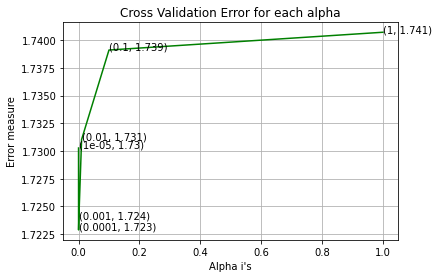

For values of best alpha =  0.0001 The train log loss is: 0.6411583395208
For values of best alpha =  0.0001 The cross validation log loss is: 1.7228855763804993
For values of best alpha =  0.0001 The test log loss is: 1.6993321618196875


In [94]:
#How good is this Variation feature in predicting y_i?
#Let's build a model just like the earlier!
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [95]:
#Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?
# Not sure! But lets be very sure using the below analysis.

In [96]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1930  genes in test and cross validation data sets?
Ans
1. In test data 75 out of 665 : 11.278195488721805
2. In cross validation data 55 out of  532 : 10.338345864661653


In [97]:
# Univariate Analysis on Text Feature
# How many unique words are present in train data?
# How are word frequencies distributed?
# How to featurize text field?
# Is the text feature useful in predicitng y_i?
# Is the text feature stable across train, test and CV dataset

In [98]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary
#At the end of this function it returns us a dictionary where the dictionary consists of word and the count(how often does this word occur)
#Given text dataset it splits all the words and then returns you number of times a word occurs

In [99]:
#This function here does the response coding of text
#Text response coding is nothing but taking the naive bayes method
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90))) #you are taking log on these probabilities
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split())) #then exponenting it, exponentiation is nothing but antilog its inverse of log
            row_index += 1
    return text_feature_responseCoding

In [100]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
CountVectorizer(min_df=3) #https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
                          #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

CountVectorizer(min_df=3)

In [101]:
text_vectorizer = CountVectorizer(min_df=3)  #you looked at count vectorizer when you looked at bag of words, text processing. Here I am saying minimum degrees of freedom=3 it means take only words which occur atleast 3 times in your total data otherwise dont take them.

In [102]:
train_df['TEXT']


2261    abstract look direct role ultraviolet radiatio...
2710    erk signaling requires ras induced raf dimeriz...
254     paucity information molecular perturbations in...
2392    protein tyrosine phosphatases ptps key positiv...
2307    recent work highlighted roles jak janus kinase...
                              ...                        
374     critical determinants dna recognition p53 iden...
481     tp53 commonly mutated gene head neck cancer hn...
1093    langerhans cell histiocytosis lch understood n...
1225    activation phosphoinositide 3 kinase pi3k path...
1363    protein kinase v akt murine thymoma viral onco...
Name: TEXT, Length: 2124, dtype: object

In [103]:
text_vectorizer.fit_transform(train_df['TEXT'])

<2124x52373 sparse matrix of type '<class 'numpy.int64'>'
	with 3303797 stored elements in Compressed Sparse Row format>

In [104]:
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])

In [105]:
# getting all the feature names (words)
text_vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '0000001',
 '000001',
 '000002',
 '000007',
 '00001',
 '000011',
 '000012',
 '000017',
 '00002644',
 '00005',
 '000059',
 '00006',
 '000077',
 '00009',
 '0001',
 '000132',
 '00014',
 '000141',
 '000179',
 '00019',
 '0001a',
 '0002',
 '00021',
 '0002158',
 '000245',
 '000249',
 '000251',
 '000258',
 '000267',
 '00028',
 '00029',
 '0003',
 '000314',
 '00034',
 '000369266',
 '00037',
 '0004',
 '0005',
 '000535',
 '000546',
 '000548',
 '000588',
 '0006',
 '0007',
 '0008',
 '00088',
 '0009',
 '00092',
 '000g',
 '000xg',
 '001',
 '0010',
 '0011',
 '001100',
 '001172713',
 '001198',
 '0012',
 '001269551',
 '0012a',
 '0013',
 '0014',
 '001429',
 '0014b',
 '0015',
 '0016',
 '001635',
 '001654',
 '0017',
 '0018',
 '001810',
 '0019',
 '001987',
 '001a',
 '001acd4',
 '001acd8',
 '001bathe',
 '001bimmunophenotypecd34',
 '001blyl1',
 '002',
 '002078',
 '0021',
 '0022',
 '0023',
 '0024',
 '0025',
 '0025021',
 '0026',
 '0026a',
 '0027',
 '002755',
 '0028',
 '002880',
 '0029980

In [106]:
train_text_features= text_vectorizer.get_feature_names()

In [107]:
# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_feature_onehotCoding.sum(axis=0).A1

array([2231, 5490,   11, ...,    6,    9,   16], dtype=int64)

In [108]:
len(train_text_feature_onehotCoding.sum(axis=0).A1)

52373

In [109]:
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1


In [110]:
list(train_text_features)

['00',
 '000',
 '0000',
 '0000001',
 '000001',
 '000002',
 '000007',
 '00001',
 '000011',
 '000012',
 '000017',
 '00002644',
 '00005',
 '000059',
 '00006',
 '000077',
 '00009',
 '0001',
 '000132',
 '00014',
 '000141',
 '000179',
 '00019',
 '0001a',
 '0002',
 '00021',
 '0002158',
 '000245',
 '000249',
 '000251',
 '000258',
 '000267',
 '00028',
 '00029',
 '0003',
 '000314',
 '00034',
 '000369266',
 '00037',
 '0004',
 '0005',
 '000535',
 '000546',
 '000548',
 '000588',
 '0006',
 '0007',
 '0008',
 '00088',
 '0009',
 '00092',
 '000g',
 '000xg',
 '001',
 '0010',
 '0011',
 '001100',
 '001172713',
 '001198',
 '0012',
 '001269551',
 '0012a',
 '0013',
 '0014',
 '001429',
 '0014b',
 '0015',
 '0016',
 '001635',
 '001654',
 '0017',
 '0018',
 '001810',
 '0019',
 '001987',
 '001a',
 '001acd4',
 '001acd8',
 '001bathe',
 '001bimmunophenotypecd34',
 '001blyl1',
 '002',
 '002078',
 '0021',
 '0022',
 '0023',
 '0024',
 '0025',
 '0025021',
 '0026',
 '0026a',
 '0027',
 '002755',
 '0028',
 '002880',
 '0029980

In [111]:
zip(list(train_text_features),train_text_fea_counts)

In [112]:
dict(zip(list(train_text_features),train_text_fea_counts)) # zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured

{'00': 2231,
 '000': 5490,
 '0000': 11,
 '0000001': 11,
 '000001': 21,
 '000002': 11,
 '000007': 13,
 '00001': 18,
 '000011': 4,
 '000012': 4,
 '000017': 4,
 '00002644': 4,
 '00005': 13,
 '000059': 4,
 '00006': 4,
 '000077': 78,
 '00009': 6,
 '0001': 1480,
 '000132': 17,
 '00014': 5,
 '000141': 9,
 '000179': 17,
 '00019': 4,
 '0001a': 18,
 '0002': 138,
 '00021': 3,
 '0002158': 13,
 '000245': 20,
 '000249': 19,
 '000251': 18,
 '000258': 12,
 '000267': 34,
 '00028': 5,
 '00029': 5,
 '0003': 79,
 '000314': 3,
 '00034': 4,
 '000369266': 35,
 '00037': 6,
 '0004': 58,
 '0005': 75,
 '000535': 13,
 '000546': 12,
 '000548': 57,
 '000588': 12,
 '0006': 39,
 '0007': 36,
 '0008': 206,
 '00088': 5,
 '0009': 19,
 '00092': 4,
 '000g': 65,
 '000xg': 7,
 '001': 2533,
 '0010': 14,
 '0011': 22,
 '001100': 3,
 '001172713': 4,
 '001198': 5,
 '0012': 34,
 '001269551': 3,
 '0012a': 3,
 '0013': 62,
 '0014': 65,
 '001429': 3,
 '0014b': 6,
 '0015': 14,
 '0016': 40,
 '001635': 7,
 '001654': 4,
 '0017': 7,
 '0018

In [113]:
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

In [114]:
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52373


In [115]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class

In [116]:
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    print(cls_text)

        ID    Gene             Variation  Class  \
820    820   ERCC2                 V242F      1   
2670  2670   BRCA1                T1691K      1   
495    495    TP53                 T150I      1   
1157  1157   KMT2C              Deletion      1   
1163  1163  ARID1B  Truncating_Mutations      1   
...    ...     ...                   ...    ...   
506    506    TP53                 H214Q      1   
594    594   SMAD4                 V370D      1   
2432  2432   BRCA1                L1657P      1   
374    374    TP53                 C277Q      1   
1093  1093  MAP3K1               T1481fs      1   

                                                   TEXT  
820   introduction platinum based chemotherapy stand...  
2670  genetic screening breast ovarian cancer suscep...  
495   inheritance germ line mutant alleles brca1 brc...  
1157  abstract monomethylation histone h3 lys 4 h3k4...  
1163  human atp dependent switch sucrose nonfermenta...  
...                                    

In [117]:
extract_dictionary_paddle(cls_text)

defaultdict(int,
            {'abstract': 8,
             'myelodysplastic': 51,
             'syndromes': 37,
             'mds': 441,
             'hematopoietic': 94,
             'stem': 130,
             'cell': 1384,
             'disorders': 27,
             'often': 24,
             'progress': 9,
             'chemotherapy': 22,
             'resistant': 32,
             'secondary': 69,
             'acute': 52,
             'myeloid': 214,
             'leukemia': 136,
             'saml': 19,
             'used': 353,
             'whole': 97,
             'genome': 172,
             'sequencing': 258,
             'perform': 28,
             'unbiased': 6,
             'comprehensive': 11,
             'screen': 21,
             'discover': 5,
             'somatic': 135,
             'mutations': 2015,
             'sample': 151,
             'genotyped': 8,
             'loci': 75,
             'matched': 20,
             'show': 136,
             'missense': 51,
       

In [118]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

In [119]:
dict_list

[defaultdict(int,
             {'introduction': 718,
              'platinum': 46,
              'based': 2838,
              'chemotherapy': 381,
              'standard': 620,
              'care': 128,
              'patients': 6141,
              'muscle': 212,
              'invasive': 263,
              'metastatic': 430,
              'urothelial': 156,
              'carcinoma': 1094,
              '20': 2936,
              'years': 906,
              '1': 23917,
              '3': 14477,
              'neoadjuvant': 79,
              'cisplatin': 396,
              'leads': 612,
              '14': 2515,
              '25': 2017,
              'relative': 1266,
              'risk': 1808,
              'reduction': 660,
              'death': 471,
              'ct2': 6,
              't4an0m0': 4,
              'refs': 222,
              '5': 11612,
              'pathologic': 85,
              'downstaging': 8,
              'complete': 867,
              'response': 1734,
 

In [120]:
extract_dictionary_paddle(train_df)

defaultdict(int,
            {'abstract': 719,
             'look': 338,
             'direct': 4915,
             'role': 13110,
             'ultraviolet': 132,
             'radiation': 1126,
             'uv': 1275,
             'exposure': 1850,
             'cutaneous': 912,
             'melanoma': 10543,
             'induction': 3522,
             'studied': 3299,
             'xeroderma': 51,
             'pigmentosum': 51,
             'xp': 385,
             'patients': 55695,
             'defective': 2967,
             'dna': 36261,
             'repair': 5932,
             'resulting': 5333,
             '1000': 1047,
             'fold': 7903,
             'increase': 7204,
             'risk': 7279,
             'melanomas': 3222,
             'anatomic': 98,
             'distribution': 3352,
             'general': 2666,
             'population': 4498,
             'analyzed': 11147,
             'laser': 321,
             'capture': 775,
             'microdissecti

In [121]:
total_dict = extract_dictionary_paddle(train_df)

In [122]:
confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [123]:
confuse_array

array([[0.08444636, 0.04394657, 0.00646273, ..., 0.13399397, 0.00517019,
        0.00689358],
       [0.15250896, 0.11792115, 0.01290323, ..., 0.33422939, 0.00573477,
        0.02060932],
       [0.0990099 , 0.12871287, 0.0990099 , ..., 0.17821782, 0.0990099 ,
        0.0990099 ],
       ...,
       [0.125     , 0.125     , 0.10416667, ..., 0.11458333, 0.10416667,
        0.10416667],
       [0.12121212, 0.15151515, 0.1010101 , ..., 0.12121212, 0.1010101 ,
        0.1010101 ],
       [0.11320755, 0.09433962, 0.09433962, ..., 0.20754717, 0.09433962,
        0.11320755]])

In [124]:
get_text_responsecoding(train_df)

array([[0.16153138, 0.12301818, 0.02188456, ..., 0.27239746, 0.00768104,
        0.01390847],
       [0.12012168, 0.1571272 , 0.02033322, ..., 0.36119617, 0.00766774,
        0.0127123 ],
       [0.13073005, 0.13622681, 0.01921833, ..., 0.36677331, 0.00818118,
        0.01296719],
       ...,
       [0.15343732, 0.12888579, 0.02340539, ..., 0.30507659, 0.00954956,
        0.01593064],
       [0.12564408, 0.1299671 , 0.02142875, ..., 0.37495877, 0.00838568,
        0.0147287 ],
       [0.12308112, 0.11210306, 0.02759217, ..., 0.37225216, 0.00849871,
        0.01495741]])

In [125]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [126]:
(train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T

array([[0.17992121, 0.13702341, 0.02437604, ..., 0.30340904, 0.00855551,
        0.01549191],
       [0.13211549, 0.17281592, 0.02236343, ..., 0.3972606 , 0.00843334,
        0.01398159],
       [0.14521623, 0.15132208, 0.02134791, ..., 0.40741541, 0.00908773,
        0.01440408],
       ...,
       [0.17211911, 0.1445783 , 0.02625512, ..., 0.34222124, 0.01071227,
        0.01787028],
       [0.13898103, 0.14376293, 0.02370338, ..., 0.41476014, 0.00927581,
        0.01629213],
       [0.13658769, 0.12440493, 0.03062005, ..., 0.41310205, 0.00943133,
        0.01659879]])

In [127]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [128]:
normalize(train_text_feature_onehotCoding, axis=0)

<2124x52373 sparse matrix of type '<class 'numpy.float64'>'
	with 3303797 stored elements in Compressed Sparse Column format>

In [129]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)


In [130]:
text_vectorizer.transform(test_df['TEXT'])

<665x52373 sparse matrix of type '<class 'numpy.int64'>'
	with 1011818 stored elements in Compressed Sparse Row format>

In [131]:
# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])

In [132]:
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [133]:
dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))

{'mutations': 151136,
 'cells': 117593,
 'cell': 80348,
 'mutation': 66621,
 'fig': 66364,
 'et': 64886,
 'al': 64762,
 'cancer': 61896,
 'figure': 61411,
 'patients': 55695,
 'protein': 53727,
 'expression': 49317,
 'activity': 48911,
 'mutant': 46425,
 'type': 46094,
 'tumor': 44061,
 'variants': 41931,
 'also': 41913,
 'domain': 41871,
 'kinase': 41069,
 'binding': 40772,
 'using': 40225,
 'gene': 39596,
 'data': 38404,
 'egfr': 37720,
 'analysis': 37187,
 'brca1': 36536,
 'dna': 36261,
 'wild': 36238,
 '10': 35373,
 'mutants': 34418,
 'tumors': 33651,
 'two': 33453,
 'table': 32603,
 'may': 31775,
 'activation': 31505,
 'results': 29170,
 'shown': 27854,
 'one': 25879,
 'associated': 25867,
 'ras': 25850,
 'proteins': 25679,
 'genes': 25665,
 'p53': 25187,
 'used': 24508,
 'exon': 24479,
 'human': 24211,
 'growth': 24092,
 'identified': 23990,
 'found': 23818,
 'function': 23812,
 'study': 23163,
 '20': 22450,
 'signaling': 22314,
 'kit': 22088,
 'clinical': 21950,
 'levels': 21432

In [134]:
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))

In [135]:
np.array(list(sorted_text_fea_dict.values()))

array([151136, 117593,  80348, ...,      3,      3,      3], dtype=int64)

In [136]:
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [137]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 4433, 4: 3921, 5: 3031, 6: 2763, 7: 2062, 8: 1901, 9: 1540, 10: 1417, 11: 1320, 12: 1242, 14: 1046, 15: 888, 16: 823, 18: 815, 13: 807, 20: 609, 17: 598, 21: 499, 19: 488, 22: 475, 24: 444, 28: 407, 34: 404, 26: 398, 23: 367, 27: 360, 25: 356, 30: 322, 44: 312, 35: 303, 32: 294, 36: 277, 33: 264, 40: 263, 29: 260, 39: 258, 31: 249, 42: 241, 37: 224, 45: 188, 38: 178, 48: 175, 41: 170, 54: 169, 49: 168, 50: 167, 56: 163, 46: 163, 43: 153, 52: 144, 55: 139, 47: 136, 51: 130, 53: 129, 60: 127, 63: 124, 65: 121, 68: 119, 64: 119, 78: 115, 58: 114, 57: 111, 72: 110, 66: 105, 61: 102, 71: 101, 70: 100, 77: 99, 59: 99, 69: 96, 84: 87, 90: 85, 88: 84, 73: 84, 67: 82, 62: 82, 80: 79, 86: 76, 75: 74, 81: 73, 74: 73, 89: 72, 83: 71, 82: 69, 97: 66, 93: 66, 85: 66, 96: 65, 76: 65, 94: 64, 99: 63, 98: 62, 95: 62, 91: 62, 112: 58, 92: 58, 79: 58, 105: 56, 117: 51, 108: 51, 100: 51, 124: 49, 121: 49, 103: 49, 87: 49, 107: 48, 102: 48, 125: 47, 104: 47, 113: 46, 110: 46, 109: 45, 111: 44, 

For values of alpha =  1e-05 The log loss is: 1.3052268974612418
For values of alpha =  0.0001 The log loss is: 1.2136856582770452
For values of alpha =  0.001 The log loss is: 1.2072786949356071
For values of alpha =  0.01 The log loss is: 1.2830272773095617
For values of alpha =  0.1 The log loss is: 1.471616416673119
For values of alpha =  1 The log loss is: 1.7260514523980643


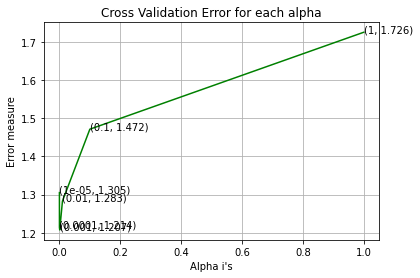

For values of best alpha =  0.001 The train log loss is: 0.6441156011472146
For values of best alpha =  0.001 The cross validation log loss is: 1.2072786949356071
For values of best alpha =  0.001 The test log loss is: 1.1898394004320763


In [138]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [139]:
#Is the Text feature stable across all the data sets (Test, Train, Cross validation)?

#Ans. Yes, it seems like!

In [140]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [141]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

97.0 % of word of test data appeared in train data
97.144 % of word of Cross Validation appeared in train data


In [142]:
#Machine Learning Models

In [143]:
#Data preparation for ML models.

#miscellaneous functionn for ML models
#This function takes training and test data it fits the calibrated classifier on top of it and then it prints log loss,number of misclassified points
#This also plots the confusion matrix 3 matrices 1)confusion matrix 2)precision matrix 3)recall matrix


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [144]:
#This function computes log loss
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [145]:
# this function will be used just for naive bayes because we want to get some feature importance for naive bayes classifier
#this function is used only in the context of naive bayes classifier and not other classifiers
#this gives us names of features given feature index in your one hot encoding
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [146]:
#Stacking the three types of features

In [147]:
# merging gene, variation and text features
# hstack combines your gene feature,variation feature and text feature
#It takes the gene feature it concatenate the variation feature and then it concatenates the text feature for each datapoint
#we are doing this both for onehotcoding and responsecoding
# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

#using this we are getting xi's(feature data) across all 3 features for training data,test data,CV data
#We get train,test,CV xi's

In [148]:
train_gene_feature_onehotCoding

<2124x235 sparse matrix of type '<class 'numpy.int64'>'
	with 2124 stored elements in Compressed Sparse Row format>

In [149]:
train_variation_feature_onehotCoding

<2124x1961 sparse matrix of type '<class 'numpy.int64'>'
	with 2229 stored elements in Compressed Sparse Row format>

In [150]:
hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))

<2124x2196 sparse matrix of type '<class 'numpy.int64'>'
	with 4353 stored elements in COOrdinate format>

In [151]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
#gene and variation feature combined(onehotcoding) for train data 

In [152]:
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))#gene and variation feature combined(onehotcoding) for test data 
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))#gene and variation feature combined(onehotcoding) for cv data 

In [153]:
hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr() 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.tocsr.html
#Convert this matrix to Compressed Sparse Row format

<2124x54569 sparse matrix of type '<class 'numpy.float64'>'
	with 3308150 stored elements in Compressed Sparse Row format>

In [154]:
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
#combined gene,variation feature again added to text feature for train data

In [155]:
train_df['Class']

2261    4
2710    7
254     7
2392    7
2307    7
       ..
374     1
481     4
1093    1
1225    7
1363    7
Name: Class, Length: 2124, dtype: int64

In [156]:
list(train_df['Class'])

[4,
 7,
 7,
 7,
 7,
 2,
 7,
 7,
 7,
 7,
 5,
 7,
 2,
 4,
 2,
 7,
 7,
 7,
 4,
 1,
 1,
 7,
 5,
 1,
 6,
 1,
 9,
 4,
 7,
 4,
 7,
 4,
 2,
 2,
 1,
 4,
 7,
 7,
 1,
 2,
 2,
 4,
 3,
 7,
 7,
 4,
 7,
 7,
 7,
 4,
 7,
 1,
 5,
 6,
 7,
 5,
 4,
 7,
 7,
 2,
 6,
 2,
 7,
 1,
 2,
 2,
 1,
 1,
 5,
 5,
 6,
 5,
 7,
 4,
 7,
 7,
 6,
 2,
 7,
 4,
 4,
 6,
 1,
 7,
 7,
 7,
 7,
 6,
 7,
 7,
 4,
 7,
 7,
 2,
 1,
 7,
 2,
 4,
 7,
 6,
 5,
 7,
 4,
 2,
 5,
 2,
 4,
 7,
 4,
 7,
 9,
 3,
 1,
 7,
 2,
 7,
 2,
 7,
 4,
 6,
 7,
 7,
 1,
 1,
 4,
 4,
 1,
 6,
 1,
 2,
 5,
 4,
 7,
 4,
 6,
 4,
 6,
 3,
 7,
 6,
 7,
 1,
 7,
 7,
 5,
 9,
 2,
 4,
 2,
 5,
 4,
 2,
 9,
 5,
 7,
 1,
 1,
 2,
 4,
 1,
 7,
 7,
 7,
 5,
 2,
 5,
 7,
 1,
 7,
 1,
 4,
 2,
 4,
 2,
 4,
 7,
 9,
 4,
 2,
 5,
 7,
 4,
 4,
 7,
 2,
 6,
 2,
 1,
 5,
 6,
 1,
 6,
 7,
 7,
 7,
 1,
 1,
 2,
 2,
 7,
 2,
 1,
 7,
 7,
 7,
 1,
 1,
 7,
 4,
 5,
 1,
 4,
 1,
 4,
 1,
 7,
 1,
 1,
 7,
 2,
 4,
 4,
 7,
 5,
 4,
 7,
 5,
 7,
 4,
 4,
 4,
 7,
 2,
 5,
 7,
 7,
 6,
 7,
 2,
 6,
 2,
 6,
 6,
 7,
 7,
 4,
 5,
 4,
 4,
 2,


In [157]:
np.array(list(train_df['Class']))

array([4, 7, 7, ..., 1, 7, 7])

In [158]:
train_y = np.array(list(train_df['Class']))

In [159]:
test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr() #combined gene,variation feature again added to text feature for test data
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr() #combined gene,variation feature again added to text feature for cv data
cv_y = np.array(list(cv_df['Class']))


In [160]:
#similarly we are going to get for responsecoding
train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))

In [161]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)
#for one hot encoding for train data we have 2124 points and dimentionality of data is 54963(because most of these will be text features(text is represented with bag of words))
#Dtrain={xi,yi} i varies from 1 to 2124 
#xi belongs to IR^55975(55975 dimensions)
#you have 665 points again same dimensionality(55975) in your test data 
#you have 532 points again sane dimensionality(55975) in your CV data


One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54569)
(number of data points * number of features) in test data =  (665, 54569)
(number of data points * number of features) in cross validation data = (532, 54569)


In [162]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)
#In response coding the features will be far fewer
#In response coding you would be having 9 features corresponding to gene,9 features corresponding to variation and 9 features corresponding to text data
#Each of this corresponds to class labels
#In total you have 27 features if you stack them up
#number of points in train,test and CV are the same i.e 2124,665,532 but the features are only 27 dimensions
#when we use response coding we get 27 dimensional data 
#If you have low dimensional data like this(27 dimensions) decision trees can handle this data very easily,KNN also works very well,Random forest works well
#when we use onehot encoding we get 55975 dimensional data
#when we do onehot encoding we get high dimensional data which some models like logistic regression,linear svm,Naive bayes can handle very well
#Decision Trees cannot handle high dimensional data very well
#Based on what type of data you have different models need to be used
#we have 2 datasets 
#D={xi,yi} where xi s are all onehot encoded
#D'={xi',yi} where xi' s are all response coded 

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


In [163]:
#Base Line Model

In [164]:
#one hot encoding you will be having 55k plus high dimensional data
#when you have text data naive bayes is a simple base line model people typically use because naive bayes works very well on text
#In this high dimensional data most of data is because of text data
#Naive Bayes

In [165]:
#Hyper parameter tuning

for alpha = 1e-05
Log Loss : 1.2558069457398466
for alpha = 0.0001
Log Loss : 1.2545233875281396
for alpha = 0.001
Log Loss : 1.253875954888719
for alpha = 0.1
Log Loss : 1.274169606689824
for alpha = 1
Log Loss : 1.3055185038554422
for alpha = 10
Log Loss : 1.3585813281880348
for alpha = 100
Log Loss : 1.3167085024202607
for alpha = 1000
Log Loss : 1.273087968716218


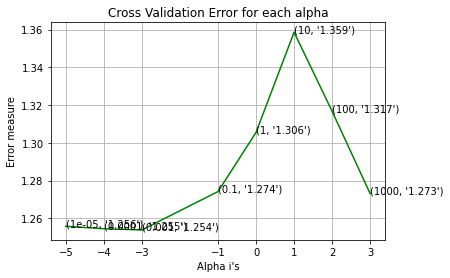

For values of best alpha =  0.001 The train log loss is: 0.819658315507185
For values of best alpha =  0.001 The cross validation log loss is: 1.253875954888719
For values of best alpha =  0.001 The test log loss is: 1.266070663477201


In [166]:
#Here as there are multiple classes we are going to use multinomial naive base
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
#Calibratedclassifier basically takes your yi's and converts them into probability values
#we need to do this because we are using logloss and we want class probabilities because without that the pathologist cannot decide
#pathologist doesn't  want the class label he  wants probabilities 
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000] #In naive bayes, alpha in laplace smoothing is the hyper parameter 
                                                       #we do simple grid search on alphas for various values of alphas
cv_log_error_array = []
for i in alpha:   
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i) #Train a multinomial naive bayes with a alpha 
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid") #applying Calibratedclassifier on top of it to convert everything to probabilities 
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding) 
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [167]:
#Testing the model with best hyper paramters

Log Loss : 1.253875954888719
Number of missclassified point : 0.37969924812030076
-------------------- Confusion matrix --------------------


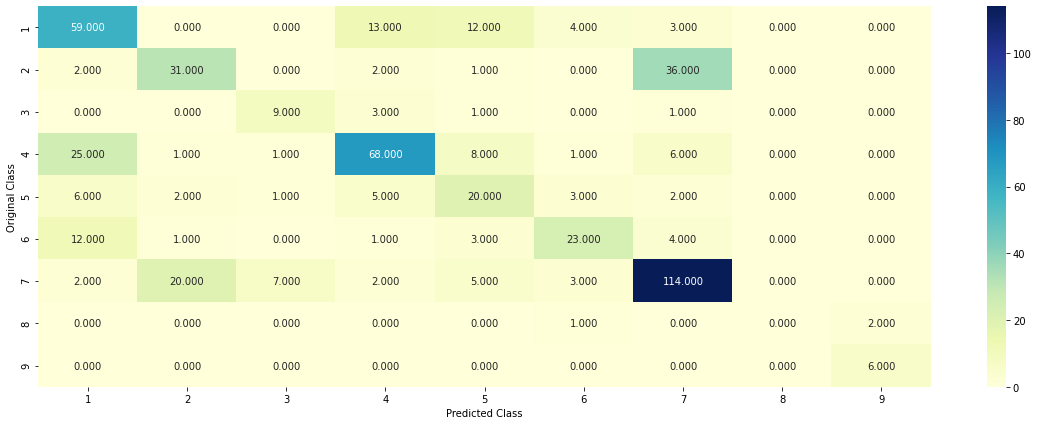

-------------------- Precision matrix (Columm Sum=1) --------------------


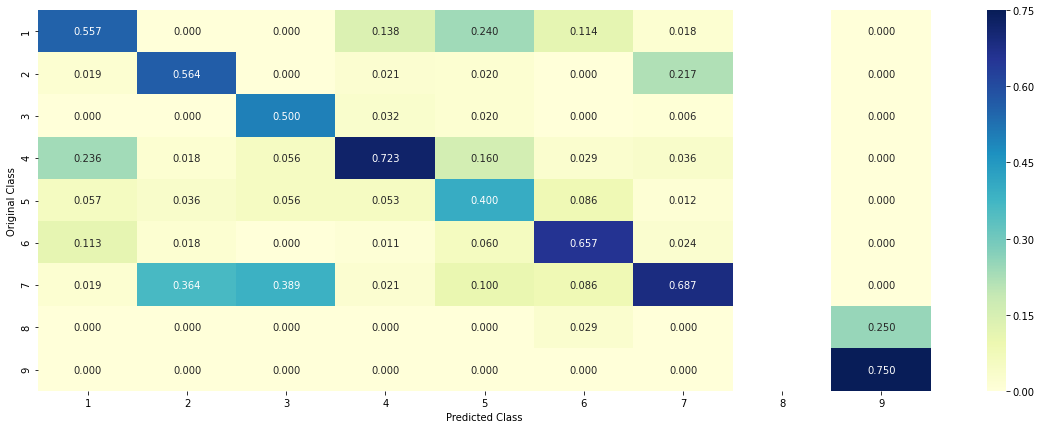

-------------------- Recall matrix (Row sum=1) --------------------


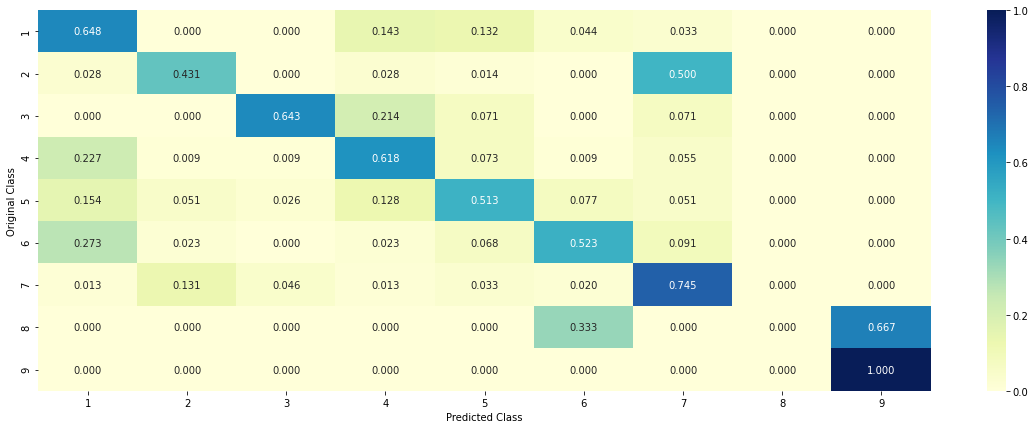

In [168]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

In [169]:
#Feature Importance, Correctly classified point

In [170]:
test_point_index = 1

In [171]:
no_feature = 100

In [172]:
test_x_onehotCoding[test_point_index]

<1x54569 sparse matrix of type '<class 'numpy.float64'>'
	with 2117 stored elements in Compressed Sparse Row format>

In [173]:
sig_clf.predict(test_x_onehotCoding[test_point_index])

array([1])

In [174]:
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])

In [175]:
print("Predicted Class :", predicted_cls[0])

Predicted Class : 1


In [176]:
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))

Predicted Class Probabilities: [[0.5676 0.0849 0.0137 0.13   0.043  0.0354 0.1138 0.0061 0.0056]]


In [177]:
test_y[test_point_index]

1

In [178]:
print("Actual Class :", test_y[test_point_index])

Actual Class : 1


In [179]:
np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]

array([[    0, 35634, 35635, 35637, 35639, 15242, 35640, 35641, 35644,
        35647, 35648, 15235, 35652, 35656, 15232, 35657, 35658, 15229,
        35630, 15228, 35629, 15251, 15271, 35603, 15269, 35604, 15267,
        15264, 15263, 15262, 35618, 35619, 35621, 35622, 15256, 15255,
        35624, 15253, 15252, 35627, 35596, 15227, 35660, 35700, 15192,
        35701, 15190, 35702, 35703, 35704, 35705, 35706, 15184, 15183,
        35707, 35708, 35709, 15179, 35710, 35711, 35698, 35659, 15195,
        35696, 35664, 35666, 35670, 35673, 35676, 35683, 35685, 35688,
        35689, 15210, 35690, 35691, 35692, 35693, 15203, 35694, 35695,
        35697, 35712, 35595, 35592, 35475, 35480, 35481, 35482, 15343,
        35484, 15341, 15340, 35487, 35488, 15336, 15335, 35491, 35492,
        35495]], dtype=int64)

In [180]:
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]

In [181]:
print("-"*50)

--------------------------------------------------


In [182]:
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Out of the top  100  features  0 are present in query point


In [183]:
#one of the key business requirements we want our model to give probabilities and we want our model to be interpretable
#here I am taking a test point which actually belongs to class 9 yi=9
#predicted probabilities are probability of belonging to class 1=0.3358,probability of belonging to class 2=0.0907,probability of belonging to class 3=0.0249,....etc...
#of all these the highest probability is 0.3749 belonging to class 4 hence we predicted it to be class 4 
#but actual class is 9 which means this point is incorrectly classified
#of all these the highest probability is p(yi=4/xi)=0.3749 belonging to class 4 but predicted to be class 9 
#2nd highest probability p(yi=2/xi)=0.1284
#1st highest probability and 2nd highest probabilities are very close
#Because these values are very close I am not able to make a call 
#Probably my model may not be right
#I may want to redo this manually send it to a pathologist to review this whole thing
#By looking at probabilities I can understand whether to trust a model or not
#these probabilities are so close I dont want to trust the model
#But the model gives me explanation of what are all the important features in predicting to be class 4
#here in trial code it is showing 'Out of the top  100  features  0 are present in query point' but for actual case look at course code where you will get explanation of what are all the important features in predicting to be class 4 
test_point_index = 1 
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)


Predicted Class : 1
Predicted Class Probabilities: [[0.5676 0.0849 0.0137 0.13   0.043  0.0354 0.1138 0.0061 0.0056]]
Actual Class : 1
--------------------------------------------------
Out of the top  100  features  0 are present in query point


In [184]:
#look at course code for this correctly interpreted case
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.371  0.0804 0.013  0.3432 0.0408 0.0334 0.1071 0.0058 0.0053]]
Actual Class : 1
--------------------------------------------------
Out of the top  100  features  0 are present in query point


for alpha = 5
Log Loss : 1.058465897502197
for alpha = 11
Log Loss : 1.072594131265181
for alpha = 15
Log Loss : 1.0912576289937888
for alpha = 21
Log Loss : 1.1040879191661632
for alpha = 31
Log Loss : 1.1120654263311867
for alpha = 41
Log Loss : 1.1108383045801549
for alpha = 51
Log Loss : 1.125037083307404
for alpha = 99
Log Loss : 1.1378447904226199


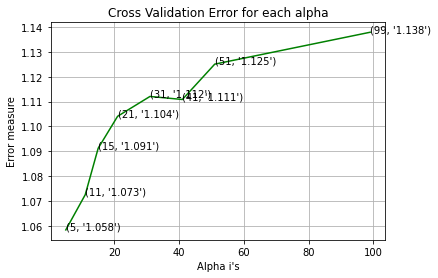

For values of best alpha =  5 The train log loss is: 0.46448239262133534
For values of best alpha =  5 The cross validation log loss is: 1.058465897502197
For values of best alpha =  5 The test log loss is: 1.0660133781429277


In [185]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99] #hyperparameter K is taken as alpha
cv_log_error_array = []
#Dtrain is used to get nearest neighbour
#Dcv is used to get hyperparameter(alpha=k)
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i) #Hyperparameter alpha is nothing but number of neighbours
    clf.fit(train_x_responseCoding, train_y) #Here we are using response coded features
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid") #we are using calibration followed by that
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [186]:
#Testing the model with best hyper paramters

Log loss : 1.058465897502197
Number of mis-classified points : 0.3458646616541353
-------------------- Confusion matrix --------------------


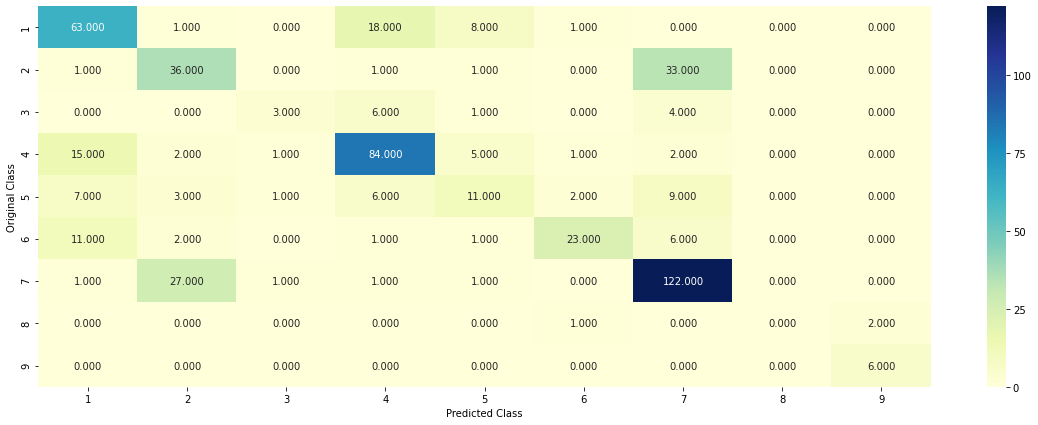

-------------------- Precision matrix (Columm Sum=1) --------------------


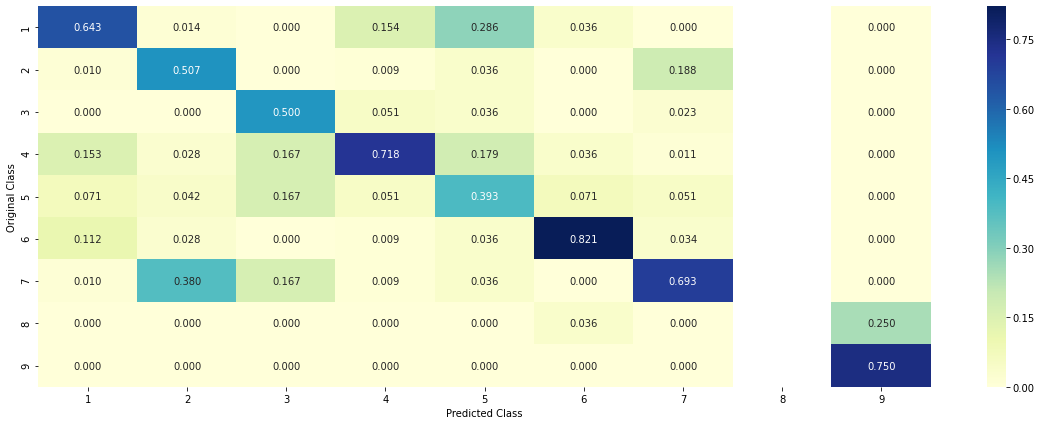

-------------------- Recall matrix (Row sum=1) --------------------


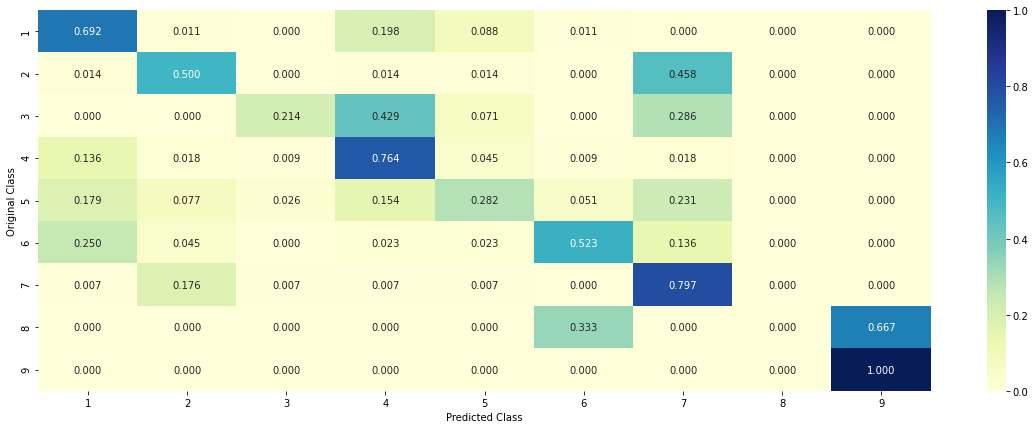

In [187]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

In [188]:
#Sample Query point -1
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier())

In [189]:
test_point_index = 1

In [190]:
test_x_responseCoding

array([[0.07874016, 0.11023622, 0.11811024, ..., 0.40895596, 0.00996104,
        0.01632139],
       [0.11578947, 0.10526316, 0.10526316, ..., 0.25740772, 0.01401329,
        0.02272746],
       [0.10185185, 0.19444444, 0.09259259, ..., 0.3542231 , 0.01236525,
        0.01888388],
       ...,
       [0.10309278, 0.13402062, 0.10309278, ..., 0.36070131, 0.01025946,
        0.01764454],
       [0.14851485, 0.0990099 , 0.0990099 , ..., 0.21758114, 0.0093391 ,
        0.01569644],
       [0.10204082, 0.12244898, 0.10204082, ..., 0.34482537, 0.01198124,
        0.02143691]])

In [191]:
test_x_responseCoding[0]

array([0.07874016, 0.11023622, 0.11811024, 0.07874016, 0.1023622 ,
       0.07874016, 0.27559055, 0.07874016, 0.07874016, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.13123372, 0.14484295,
       0.0391912 , 0.12826795, 0.06766875, 0.05355705, 0.40895596,
       0.00996104, 0.01632139])

In [192]:
test_x_responseCoding[0].reshape(1,-1)

array([[0.07874016, 0.11023622, 0.11811024, 0.07874016, 0.1023622 ,
        0.07874016, 0.27559055, 0.07874016, 0.07874016, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.13123372, 0.14484295,
        0.0391912 , 0.12826795, 0.06766875, 0.05355705, 0.40895596,
        0.00996104, 0.01632139]])

In [193]:
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))

In [194]:
predicted_cls[0]

3

In [195]:
test_y[test_point_index]

1

In [196]:
test_x_responseCoding[test_point_index]

array([0.11578947, 0.10526316, 0.10526316, 0.14736842, 0.10526316,
       0.10526316, 0.10526316, 0.10526316, 0.10526316, 0.44966443,
       0.0738255 , 0.06711409, 0.06711409, 0.06711409, 0.0738255 ,
       0.06711409, 0.06711409, 0.06711409, 0.21247821, 0.12936069,
       0.03034621, 0.19973441, 0.06325576, 0.07067626, 0.25740772,
       0.01401329, 0.02272746])

In [197]:
alpha[best_alpha]

5

In [198]:
clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])

(array([[0.02221649, 0.03393352, 0.03749421, 0.03871468, 0.04167164]]),
 array([[ 530, 1441, 1958, 1795, 1732]], dtype=int64))

In [199]:
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])

In [200]:
train_y[neighbors[1][0]]

array([1, 1, 1, 1, 1])

In [201]:
Counter(train_y[neighbors[1][0]])

Counter({1: 5})

In [202]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 3
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes [1 1 1 1 1]
Fequency of nearest points : Counter({1: 5})


In [203]:
#Sample Query Point-2 
test_point_index = 100

In [204]:
test_x_responseCoding[test_point_index].reshape(1,-1)

array([[0.13684211, 0.10526316, 0.10526316, 0.12631579, 0.10526316,
        0.10526316, 0.10526316, 0.10526316, 0.10526316, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.23045148, 0.11440311,
        0.02710772, 0.23386878, 0.05682101, 0.06087715, 0.24604475,
        0.01112852, 0.01929748]])

In [205]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 1
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [4 4 1 4 4]
Fequency of nearest points : Counter({4: 4, 1: 1})


for alpha = 1e-06
Log Loss : 1.3282454791765301
for alpha = 1e-05
Log Loss : 1.2932598040068353
for alpha = 0.0001
Log Loss : 1.1612804311930032
for alpha = 0.001
Log Loss : 1.138704538321847
for alpha = 0.01
Log Loss : 1.1847839800645887
for alpha = 0.1
Log Loss : 1.482072361434939
for alpha = 1
Log Loss : 1.6928148301101882
for alpha = 10
Log Loss : 1.718205679142322
for alpha = 100
Log Loss : 1.721048642134928


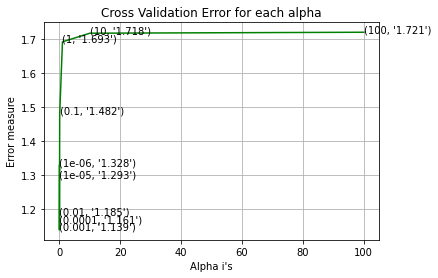

For values of best alpha =  0.001 The train log loss is: 0.5204095580098564
For values of best alpha =  0.001 The cross validation log loss is: 1.138704538321847
For values of best alpha =  0.001 The test log loss is: 1.1023251130364577


In [206]:
#Logistic Regression
#With Class balancing
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.138704538321847
Number of mis-classified points : 0.36466165413533835
-------------------- Confusion matrix --------------------


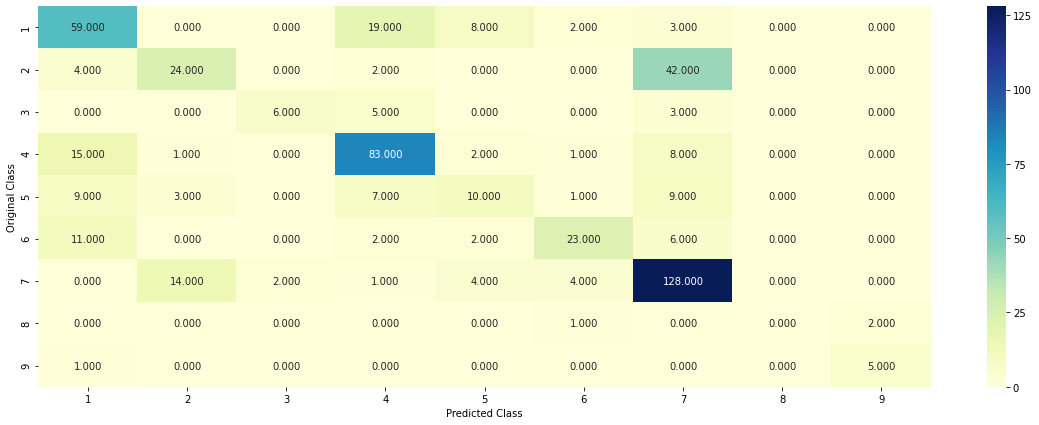

-------------------- Precision matrix (Columm Sum=1) --------------------


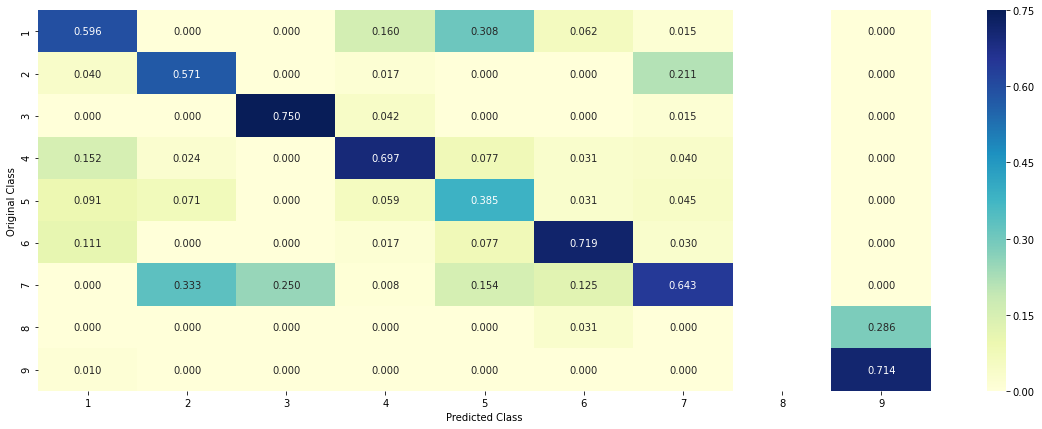

-------------------- Recall matrix (Row sum=1) --------------------


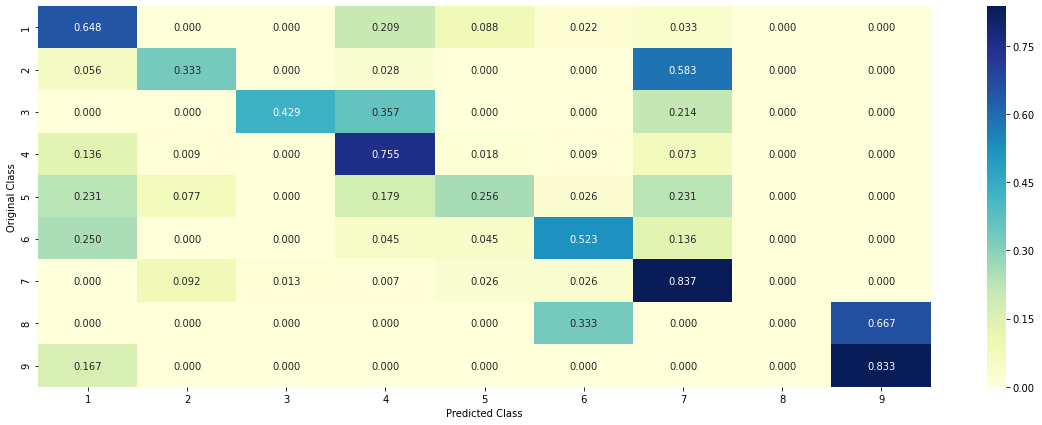

In [207]:
#Testing the model with best hyper paramters
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [208]:
#Feature Importance
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

In [209]:
#Correctly Classified point
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.65e-01 5.20e-03 4.00e-04 2.19e-02 6.00e-04 7.00e-04 2.30e-03 3.60e-03
  2.00e-04]]
Actual Class : 1
--------------------------------------------------
292 Text feature [expressing] present in test data point [True]
400 Text feature [active] present in test data point [True]
408 Text feature [intron] present in test data point [True]
464 Text feature [truncating] present in test data point [True]
Out of the top  500  features  4 are present in query point


In [210]:

test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2969 0.0068 0.0017 0.6715 0.0028 0.0011 0.0148 0.0037 0.0007]]
Actual Class : 1
--------------------------------------------------
220 Text feature [coa] present in test data point [True]
237 Text feature [harboring] present in test data point [True]
283 Text feature [novel] present in test data point [True]
312 Text feature [inhibitor] present in test data point [True]
339 Text feature [defective] present in test data point [True]
371 Text feature [suppressor] present in test data point [True]
400 Text feature [acetyl] present in test data point [True]
421 Text feature [ionizing] present in test data point [True]
423 Text feature [respond] present in test data point [True]
451 Text feature [mutually] present in test data point [True]
488 Text feature [therapeutic] present in test data point [True]
492 Text feature [middle] present in test data point [True]
Out of the top  500  features  12 are present in query point


In [211]:
#For incorrectly classified point check course code

In [212]:
#Logistic Regression Without Class balancing

for alpha = 1e-06
Log Loss : 1.3139141767678761
for alpha = 1e-05
Log Loss : 1.2731417467425554
for alpha = 0.0001
Log Loss : 1.1744683053916414
for alpha = 0.001
Log Loss : 1.1519436806702668
for alpha = 0.01
Log Loss : 1.224293426071285
for alpha = 0.1
Log Loss : 1.3718166708298105
for alpha = 1
Log Loss : 1.6706624435551363


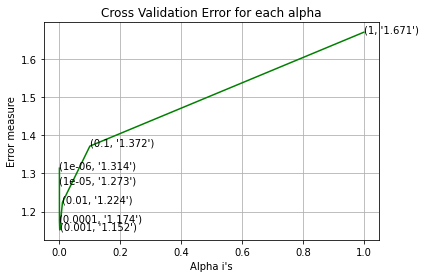

For values of best alpha =  0.001 The train log loss is: 0.5144379936018825
For values of best alpha =  0.001 The cross validation log loss is: 1.1519436806702668
For values of best alpha =  0.001 The test log loss is: 1.1099431454520983


In [213]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [214]:
#Testing model with best hyper parameters

Log loss : 1.1519436806702668
Number of mis-classified points : 0.34962406015037595
-------------------- Confusion matrix --------------------


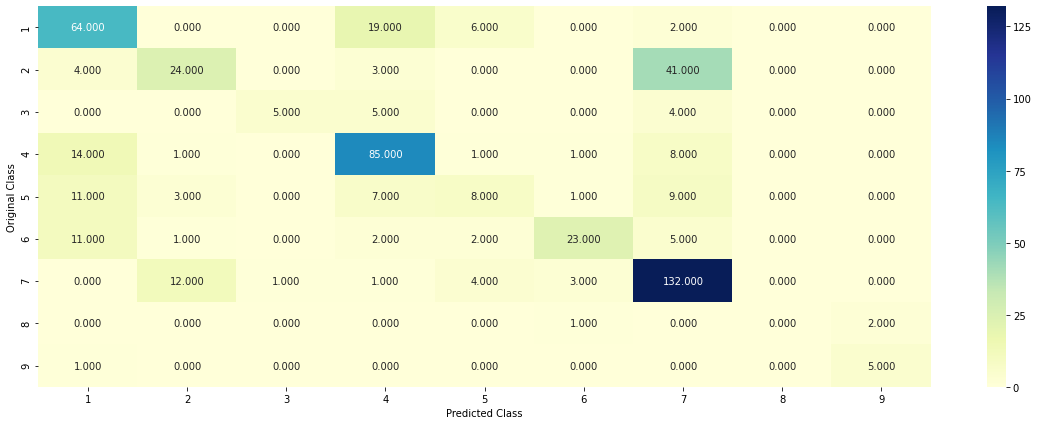

-------------------- Precision matrix (Columm Sum=1) --------------------


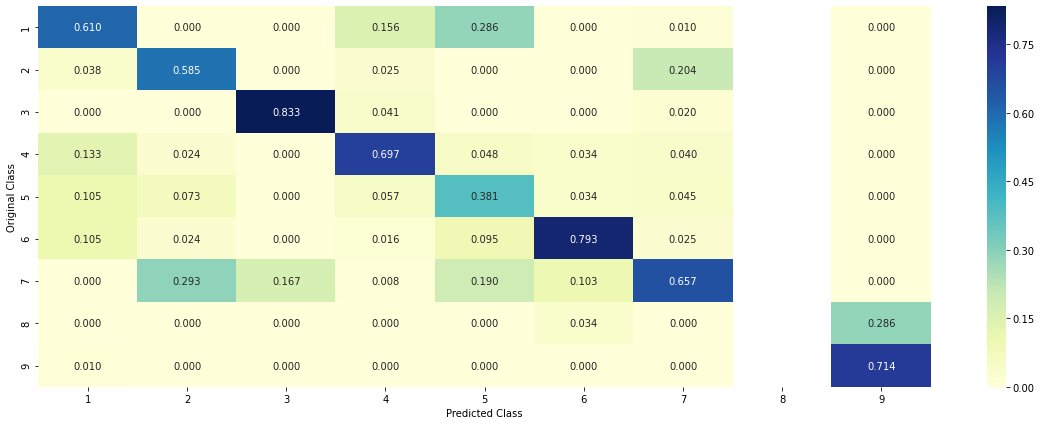

-------------------- Recall matrix (Row sum=1) --------------------


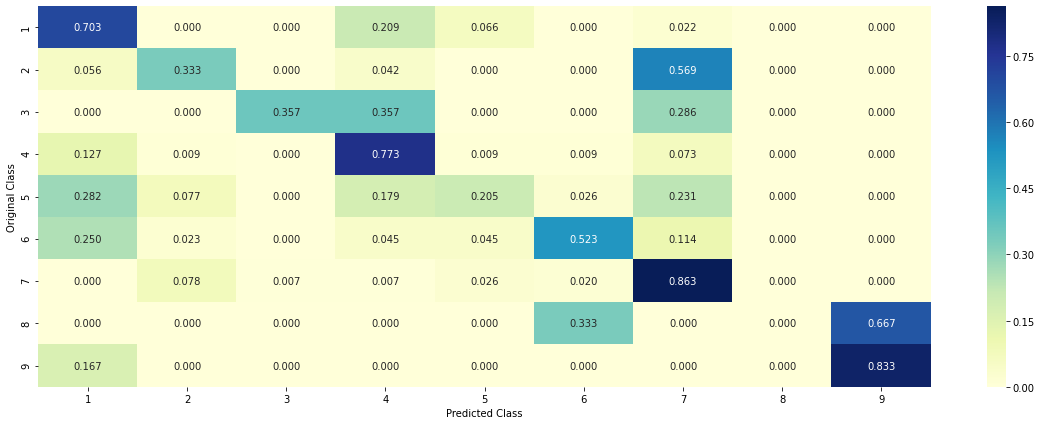

In [215]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [216]:
#Feature Importance, Correctly Classified point

In [217]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[9.658e-01 5.400e-03 3.000e-04 2.170e-02 5.000e-04 5.000e-04 4.200e-03
  1.600e-03 0.000e+00]]
Actual Class : 1
--------------------------------------------------
386 Text feature [expressing] present in test data point [True]
478 Text feature [intron] present in test data point [True]
Out of the top  500  features  2 are present in query point


In [218]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[2.922e-01 6.700e-03 1.300e-03 6.776e-01 2.300e-03 1.000e-03 1.720e-02
  1.700e-03 1.000e-04]]
Actual Class : 1
--------------------------------------------------
247 Text feature [coa] present in test data point [True]
361 Text feature [parp1] present in test data point [True]
364 Text feature [harboring] present in test data point [True]
412 Text feature [impairing] present in test data point [True]
442 Text feature [defective] present in test data point [True]
470 Text feature [suppressor] present in test data point [True]
482 Text feature [inhibitor] present in test data point [True]
484 Text feature [acetyl] present in test data point [True]
498 Text feature [novel] present in test data point [True]
Out of the top  500  features  9 are present in query point


In [219]:
#Linear Support Vector Machines

for C = 1e-05
Log Loss : 1.2881147495233007
for C = 0.0001
Log Loss : 1.2451970523184341
for C = 0.001
Log Loss : 1.1891581238816789
for C = 0.01
Log Loss : 1.1747626162121398
for C = 0.1
Log Loss : 1.3910025232847243
for C = 1
Log Loss : 1.707884532114635
for C = 10
Log Loss : 1.721532849843818
for C = 100
Log Loss : 1.7215300260954973


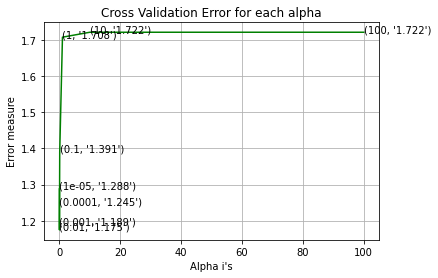

For values of best alpha =  0.01 The train log loss is: 0.7330458570937759
For values of best alpha =  0.01 The cross validation log loss is: 1.1747626162121398
For values of best alpha =  0.01 The test log loss is: 1.1722184326265759


In [220]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]  #hyper parameter is c what I am calling it alpha
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42) #we are using class balancing because we saw class balancing works well
    #Here we have to say loss='hinge' because if you say loss='log' that becomes logistic regression its a very important distinction we need to understand
    #If we say loss='hinge' it becomes linear SVM
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.1747626162121398
Number of mis-classified points : 0.37781954887218044
-------------------- Confusion matrix --------------------


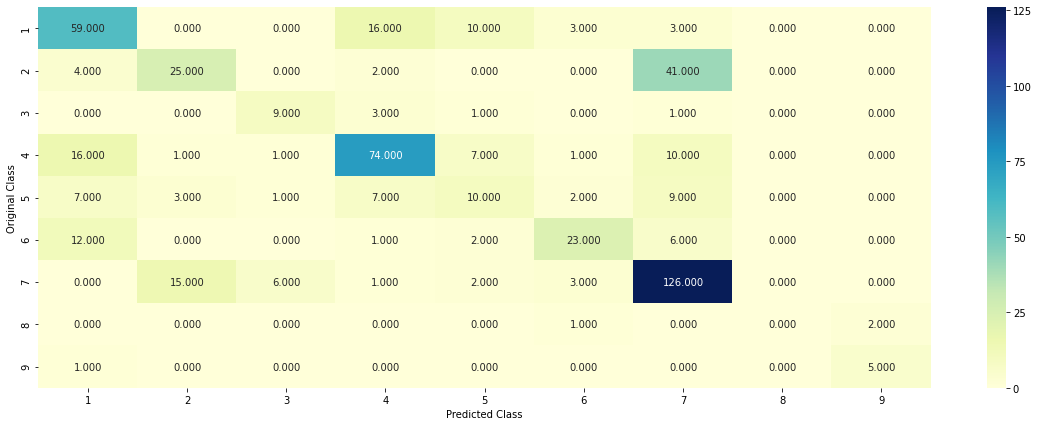

-------------------- Precision matrix (Columm Sum=1) --------------------


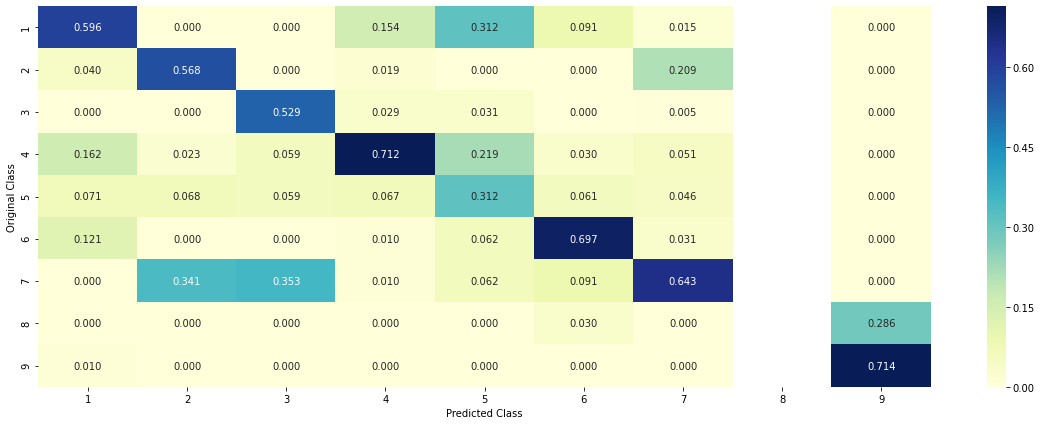

-------------------- Recall matrix (Row sum=1) --------------------


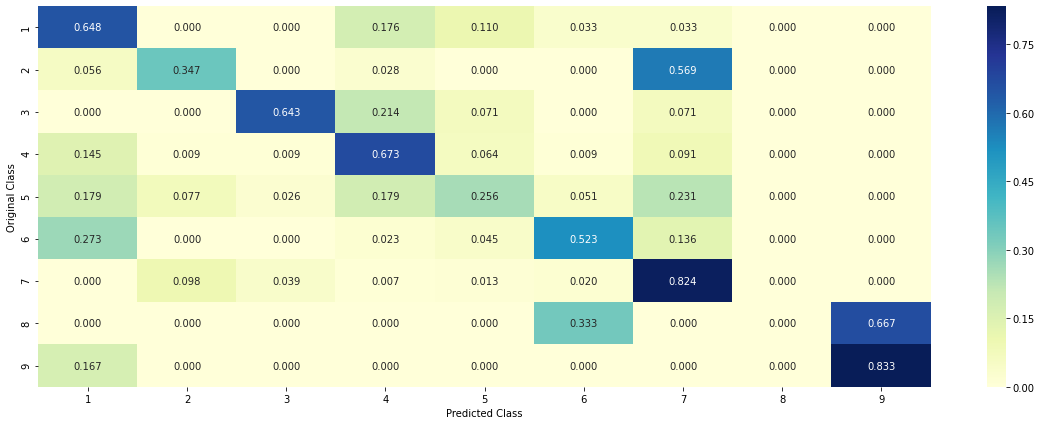

In [221]:
#Testing model with best hyper parameters
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [222]:
#For Correctly classified point
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[8.572e-01 2.350e-02 2.100e-03 7.760e-02 6.600e-03 4.200e-03 2.630e-02
  2.100e-03 5.000e-04]]
Actual Class : 1
--------------------------------------------------
122 Text feature [intron] present in test data point [True]
148 Text feature [r2] present in test data point [True]
199 Text feature [truncating] present in test data point [True]
305 Text feature [deficient] present in test data point [True]
358 Text feature [carries] present in test data point [True]
382 Text feature [slippage] present in test data point [True]
417 Text feature [referring] present in test data point [True]
Out of the top  500  features  7 are present in query point


In [223]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2966 0.0426 0.0077 0.5044 0.0251 0.0098 0.1064 0.0049 0.0025]]
Actual Class : 1
--------------------------------------------------
241 Text feature [coa] present in test data point [True]
378 Text feature [downregulate] present in test data point [True]
415 Text feature [acetyl] present in test data point [True]
428 Text feature [suppressor] present in test data point [True]
489 Text feature [autoradiography] present in test data point [True]
Out of the top  500  features  5 are present in query point


In [224]:
#Random Forest Classifier

In [ ]:
#Hyper paramter tuning (With One hot Encoding)
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2004440893543962
for n_estimators = 100 and max depth =  10
Log Loss : 1.1389447892582467
for n_estimators = 200 and max depth =  5
Log Loss : 1.181900658216869
for n_estimators = 200 and max depth =  10
Log Loss : 1.132416945797719
for n_estimators = 500 and max depth =  5
Log Loss : 1.1760372712470373
for n_estimators = 500 and max depth =  10
Log Loss : 1.1253078896990596
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1756009067822741
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1235996522116498
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1737164123017543
for n_estimators = 2000 and max depth =  10


In [ ]:
#Testing model with best hyper parameters (One Hot Encoding)

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [ ]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

In [ ]:
#Hyper paramter tuning (With Response Coding)

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:
#Testing model with best hyper parameters (Response Coding)

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

In [ ]:
#Feature Importance

In [ ]:
#Correctly Classified point

In [ ]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

In [ ]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

In [ ]:
#Stack the models 

In [ ]:
#testing with hyper parameter tuning

In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

In [ ]:
#testing the model with the best hyper parameters
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

In [ ]:
#Maximum Voting classifier

In [ ]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))